# EDA

## Tareas a Realizar

#### Pre-procesamiento:

* Chequear Nulos y Decidir si Imputar o Descartar
* Chequear Variables Categóricas y convertirlas en Numéricas
* Estandarizar o Normalizar

#### Ideas para EDA:

* Analizar la Raza de las Mascotas
* Analizar el Género
* Analizar los 3 Colores Informados para cada Mascota
* Estudiar las variables de Salud: Vacunación, Esterilización, Desparacitación
* Entender el impacto del Fee cobrado
* Estudiar las Regiones Geográficas disponibles
* Analizar el impacto de tener Fotos y/o Videos

Todos estos análisis pueden hacerse en función de la Especie (Gato/Perro) y respecto al Target



In [1]:
# Importación de Librerías
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud

%matplotlib inline
pd.set_option('display.max_columns', 30)
plt.rcParams['figure.figsize'] = [12.0, 8.0]

In [2]:
# Datos Tabulares
# train = pd.read_csv('../input/petfinder-adoption-prediction/train/train.csv')
df = pd.read_csv('../../petfinder-adoption-prediction/train/train.csv')

In [3]:
df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [4]:
print(f"registros {len(df)}\n")

nulos_por_columna = df.isnull().sum()
print(nulos_por_columna)

registros 14993

Type                0
Name             1265
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated          0
Dewormed            0
Sterilized          0
Health              0
Quantity            0
Fee                 0
State               0
RescuerID           0
VideoAmt            0
Description        13
PetID               0
PhotoAmt            0
AdoptionSpeed       0
dtype: int64


Vemos que nulos solo existen en Name y Descripción. Creemos que es importante conservarlo porque puede aportar información importante al análisis.

Ahora, checkeamos variables categoricas para ver de convertirlas a numéricas

In [5]:
df.dtypes

Type               int64
Name              object
Age                int64
Breed1             int64
Breed2             int64
Gender             int64
Color1             int64
Color2             int64
Color3             int64
MaturitySize       int64
FurLength          int64
Vaccinated         int64
Dewormed           int64
Sterilized         int64
Health             int64
Quantity           int64
Fee                int64
State              int64
RescuerID         object
VideoAmt           int64
Description       object
PetID             object
PhotoAmt         float64
AdoptionSpeed      int64
dtype: object

In [6]:
cat_list = ['Type', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2', 'Color3',
            'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized',
            'Health', 'State', 'AdoptionSpeed' ]

In [7]:
# Checkeamos cada categoría, aunque ya estén como int64
for category in cat_list:
    print(f"{category} (qty: {df[category].nunique()}):\n{df[category].unique().tolist()}\n")

Type (qty: 2):
[2, 1]

Breed1 (qty: 176):
[299, 265, 307, 266, 264, 218, 114, 285, 189, 205, 292, 128, 243, 213, 141, 173, 207, 250, 119, 195, 109, 206, 70, 103, 303, 78, 254, 10, 20, 305, 283, 306, 288, 69, 179, 31, 247, 200, 248, 26, 25, 0, 129, 202, 72, 24, 284, 286, 152, 277, 44, 75, 64, 60, 296, 185, 300, 76, 139, 242, 294, 276, 102, 182, 289, 145, 178, 233, 82, 49, 239, 231, 169, 111, 232, 270, 267, 268, 251, 58, 155, 295, 304, 147, 245, 282, 21, 215, 192, 154, 71, 272, 241, 262, 249, 273, 108, 240, 83, 293, 39, 50, 93, 1, 17, 252, 224, 100, 280, 42, 15, 190, 19, 274, 117, 263, 290, 256, 201, 105, 244, 234, 253, 281, 16, 187, 32, 165, 227, 257, 176, 214, 203, 148, 237, 11, 122, 97, 246, 125, 150, 301, 279, 123, 23, 260, 7, 5, 18, 297, 88, 65, 204, 188, 167, 269, 199, 98, 197, 85, 130, 298, 146, 132, 271, 3, 228, 212, 217, 61, 56, 302, 287, 143, 99, 81]

Breed2 (qty: 135):
[0, 264, 205, 307, 117, 251, 265, 218, 292, 266, 285, 141, 128, 96, 76, 169, 306, 18, 36, 303, 247, 195, 252,

In [8]:
# Checkeamos cada categoría, aunque ya estén como int64
for type in [1,2]:
    if type ==1:
            print("Perros:")
    else:
        print("Gatos:")
    for category in cat_list:
        df_aux = df[df["Type"] == type]
        print(f"{category} (qty: {df_aux[category].nunique()}):\n{df_aux[category].unique().tolist()}\n")
    del(df_aux)
    print("----------------------")

Perros:
Type (qty: 1):
[1]

Breed1 (qty: 116):
[307, 218, 189, 205, 128, 213, 141, 173, 207, 119, 195, 109, 206, 70, 103, 78, 10, 20, 69, 179, 31, 200, 26, 25, 0, 129, 202, 72, 24, 152, 44, 75, 64, 60, 185, 76, 139, 102, 182, 145, 178, 233, 82, 49, 239, 231, 169, 111, 232, 58, 155, 147, 215, 192, 154, 71, 108, 240, 83, 39, 50, 93, 1, 17, 224, 100, 42, 15, 190, 19, 117, 201, 105, 234, 16, 187, 32, 165, 227, 176, 214, 114, 203, 148, 237, 11, 122, 97, 125, 150, 123, 23, 7, 5, 18, 88, 65, 204, 188, 167, 199, 98, 197, 85, 130, 146, 132, 3, 228, 212, 217, 61, 56, 143, 99, 81]

Breed2 (qty: 84):
[0, 205, 307, 117, 218, 141, 128, 96, 76, 169, 18, 36, 195, 147, 178, 4, 179, 119, 103, 111, 213, 25, 109, 26, 189, 72, 70, 176, 152, 228, 20, 75, 240, 39, 239, 155, 78, 40, 188, 187, 202, 173, 49, 190, 58, 192, 44, 200, 19, 69, 201, 129, 102, 227, 14, 122, 159, 98, 24, 207, 150, 10, 2, 104, 206, 17, 65, 237, 60, 210, 203, 167, 83, 50, 21, 115, 130, 16, 212, 1, 182, 204, 146, 5]

Gender (qty: 3):
[1, 

# Primero analizamos en general Gatos y Perros

In [9]:
df['Type'] = df['Type'].apply(lambda x: 'Dog' if x == 1 else 'Cat')

Queremos ver si hay patrones de comportamiento diferentes

Cantidad:

([<matplotlib.patches.Wedge at 0x253d7d09070>,
 [Text(-0.14604463102942658, 1.090261879434239, 'Dogs'),
  Text(0.14604473310710966, -1.090261865760549, 'Cats')])

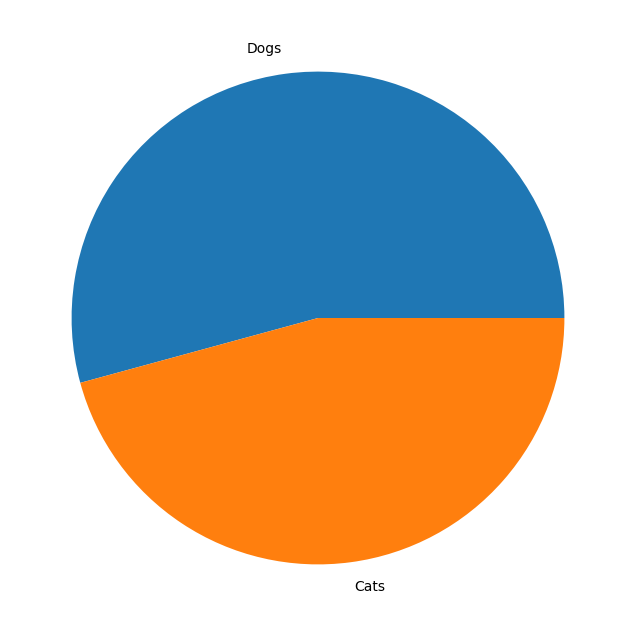

In [10]:
labels = ["Dogs", "Cats"]
count_dogs = df[df["Type"]=="Dog"].size
count_cats = df[df["Type"]=="Cat"].size
sizes = [count_dogs, count_cats]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

Conjunto:

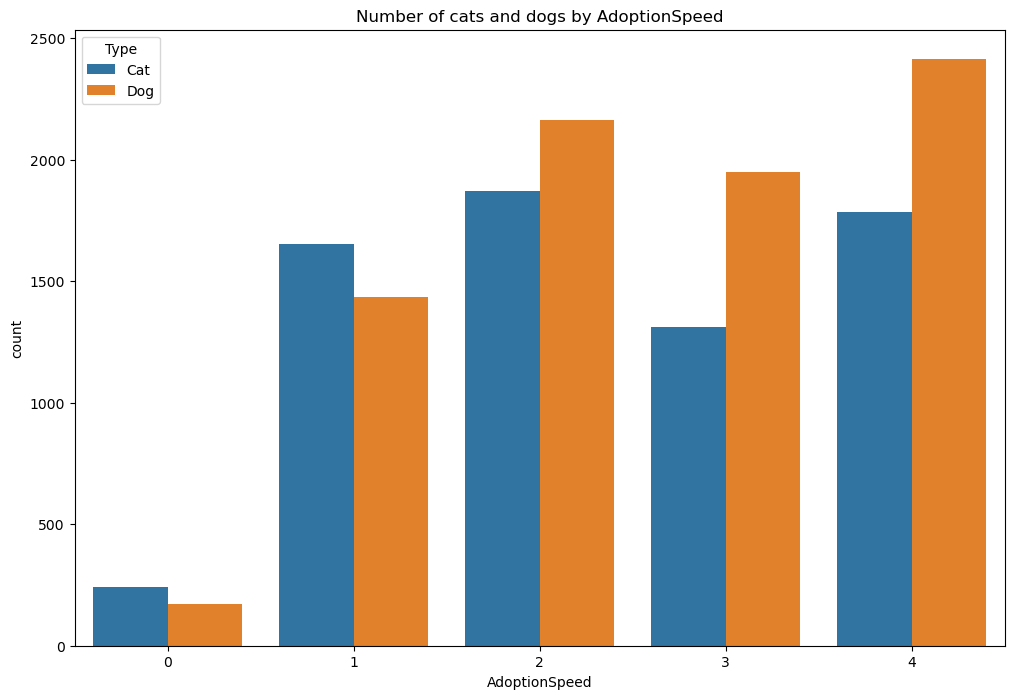

In [11]:
sns.countplot(x='AdoptionSpeed', data=df, hue='Type');
plt.title('Number of cats and dogs by AdoptionSpeed');


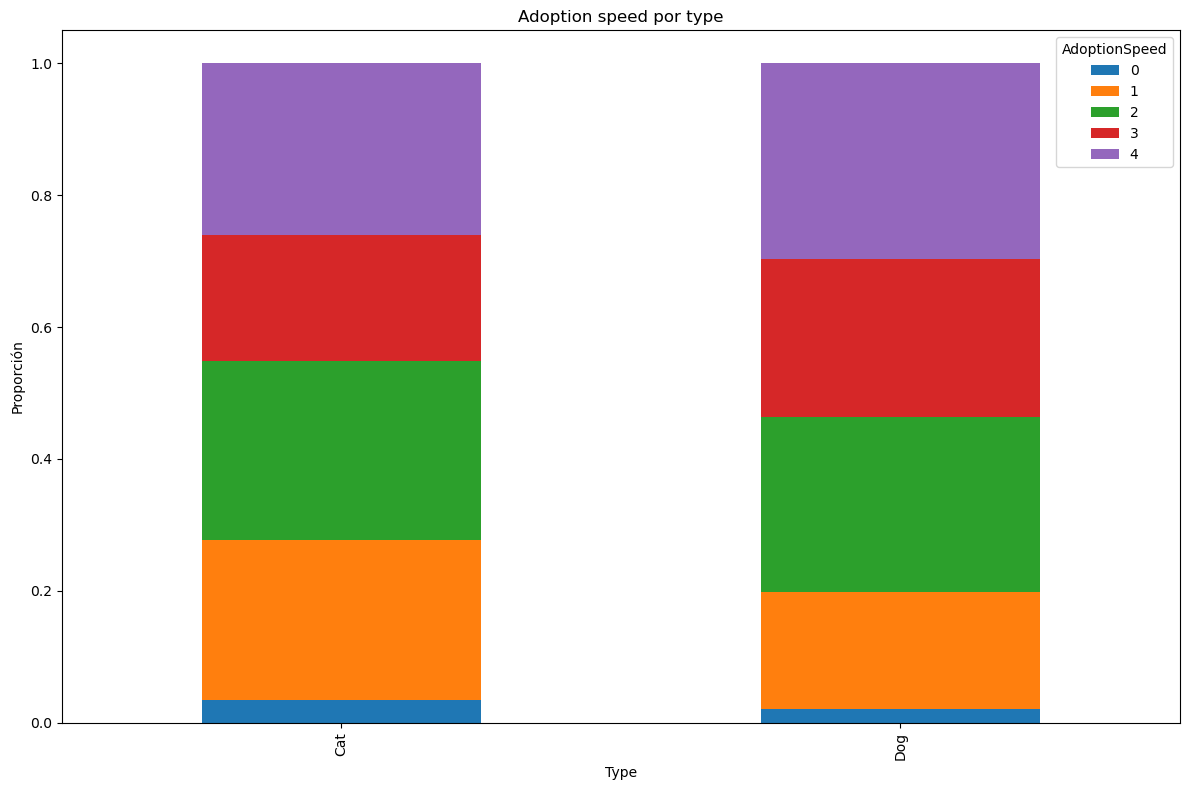

In [12]:
# Paso 1: contar por Puro y AdoptionSpeed
counts = df.groupby(['Type', 'AdoptionSpeed']).size().unstack(fill_value=0)

# Paso 2: calcular proporciones por fila (cada barra suma 1)
proportions = counts.div(counts.sum(axis=1), axis=0)

# Paso 3: graficar barras apiladas con Puro en el eje X y segmentos por AdoptionSpeed
proportions.plot(kind='bar', stacked=True)

plt.title('Adoption speed por type')
plt.xlabel('Type')
plt.ylabel('Proporción')
plt.legend(title='AdoptionSpeed', loc='upper right')
plt.tight_layout()
plt.show()

# Vamos a analizar segun pureza

In [13]:
# no normalizamos mas de lo que está

df["Puro"] = np.where((df["Breed2"] > 0) | (df["Breed1"] == 307), 0, 1)

In [14]:
#Cantidad de puros
print(f"Hay {len(df[df["Puro"]==1])} puros")

# Vemos si hay alguno con Breed1 ==0, lo cual no deberia
print(f"Sin raza 1: {len(df[(df["Breed1"] == 0)])}")

# Vemos si hay con 0 en ambos
print(f"Sin ambas: {len(df[(df["Breed1"] == 0) & (df["Breed2"] == 0)])}")

Hay 6227 puros
Sin raza 1: 5
Sin ambas: 0


In [15]:
len(df[(df["Breed1"] == 307) & (df["Breed2"] == 0)])

4535

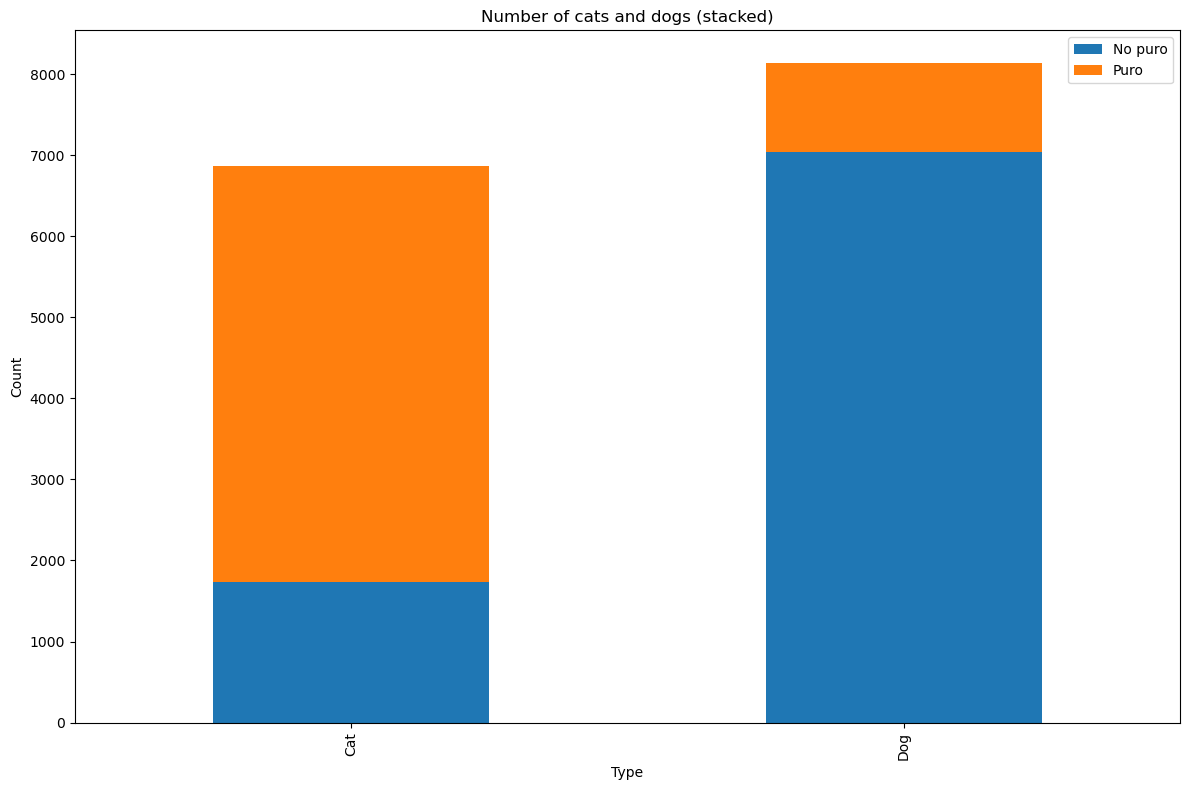

In [16]:
# Paso 1: contar ocurrencias por Type y Puro
conteo = df.groupby(['Type', 'Puro']).size().unstack(fill_value=0)

# Paso 2: graficar
conteo.plot(kind='bar', stacked=True)
plt.title('Number of cats and dogs (stacked)')
plt.xlabel('Type')
plt.ylabel('Count')
plt.legend(title='Puro')
plt.legend(["No puro", "Puro"])
plt.tight_layout()
plt.show()

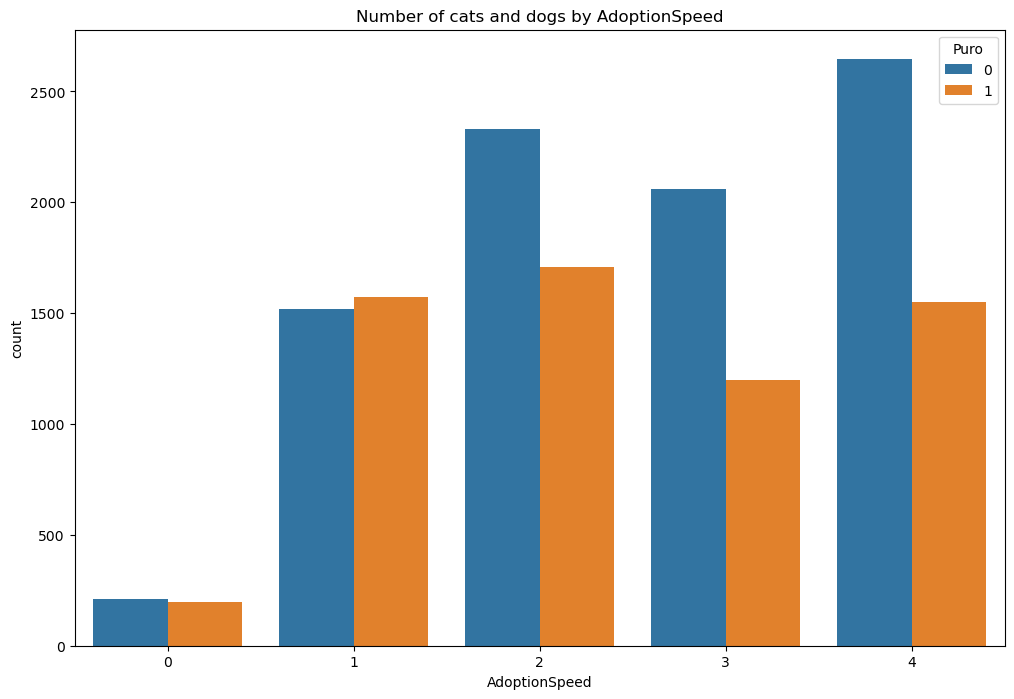

In [17]:
sns.countplot(x='AdoptionSpeed', data=df, hue='Puro');
plt.title('Number of cats and dogs by AdoptionSpeed');

In [18]:
df_dog = df[df['Type'] == "Dog"]
df_cat = df[df['Type'] == "Cat"]

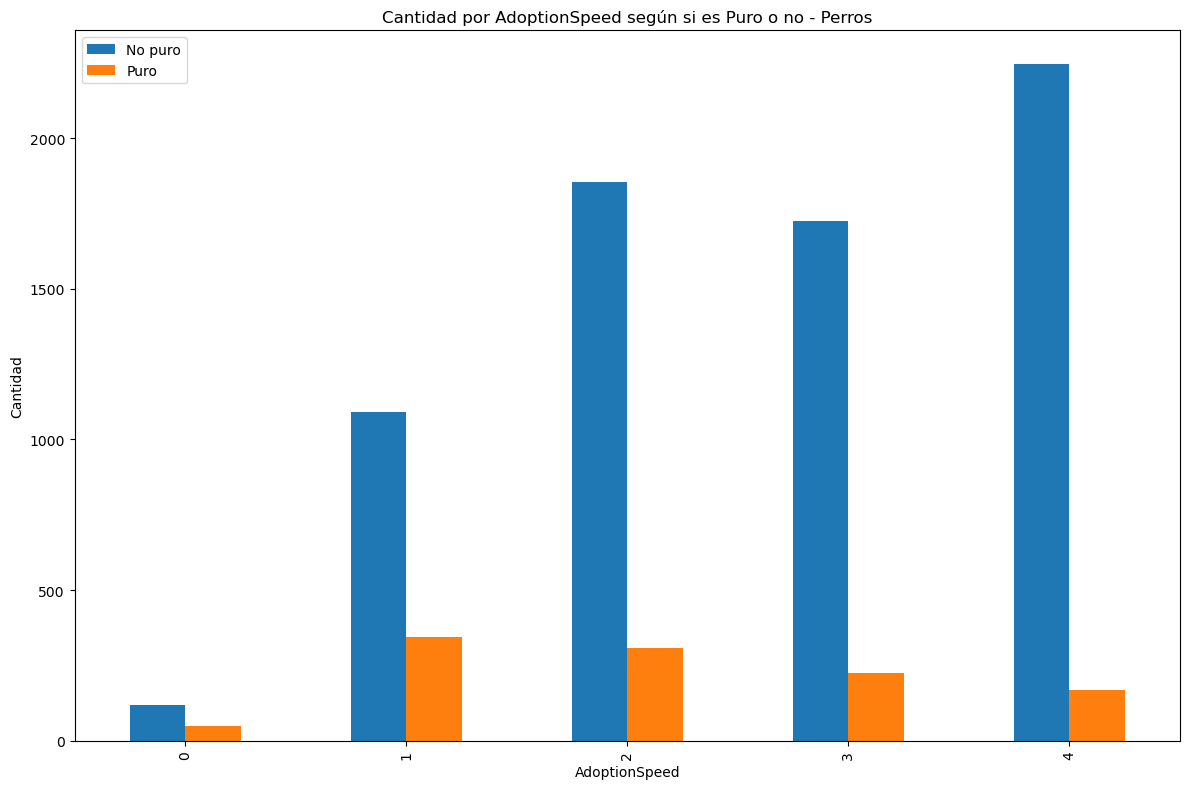

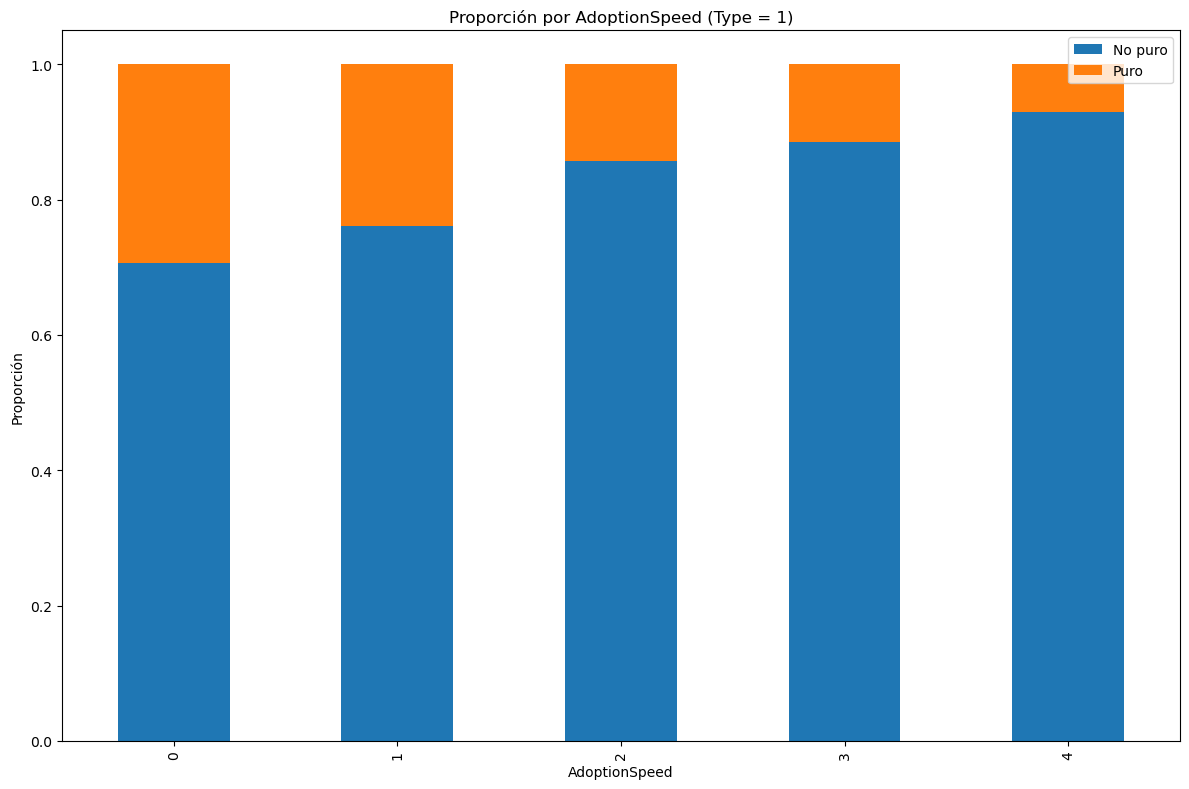

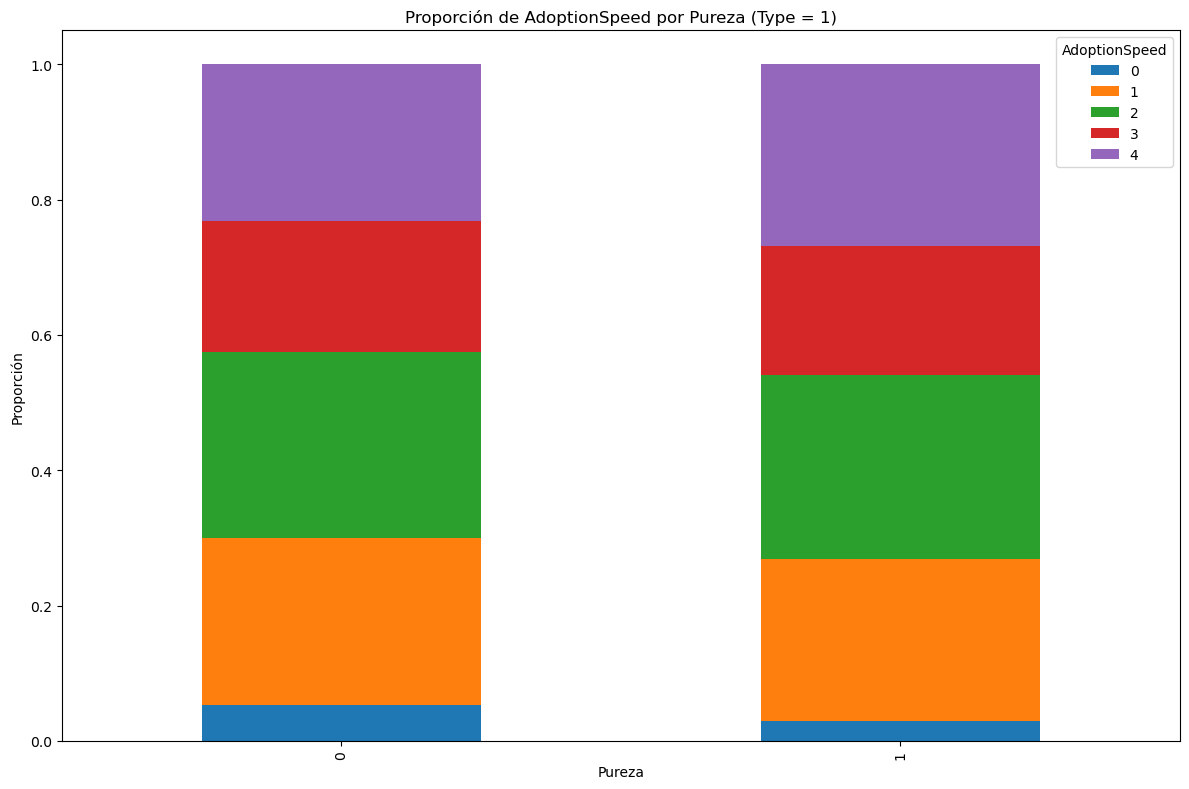

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupamos y contamos
counts = df_dog.groupby(['AdoptionSpeed', 'Puro']).size().unstack(fill_value=0)

# Graficamos
counts.plot(kind='bar', stacked=False)  # stacked=True si querés apiladas
plt.title('Cantidad por AdoptionSpeed según si es Puro o no - Perros')
plt.xlabel('AdoptionSpeed')
plt.ylabel('Cantidad')
plt.legend(title='Puro')
plt.legend(["No puro", "Puro"])
plt.tight_layout()
plt.show()

# Paso 2: contar por Speed y Puro
counts = df_dog.groupby(['AdoptionSpeed', 'Puro']).size().unstack(fill_value=0)

# Paso 3: calcular proporciones por fila
proportions = counts.div(counts.sum(axis=1), axis=0)

# Paso 4: graficar proporciones apiladas
proportions.plot(kind='bar', stacked=True)

plt.title('Proporción por AdoptionSpeed (Type = 1)')
plt.xlabel('AdoptionSpeed')
plt.ylabel('Proporción')
plt.legend(title='Puro', loc='upper right')
plt.legend(["No puro", "Puro"])
plt.tight_layout()
plt.show()

# Paso 1: contar por Puro y AdoptionSpeed
counts = df_cat.groupby(['Puro', 'AdoptionSpeed']).size().unstack(fill_value=0)

# Paso 2: calcular proporciones por fila (cada barra suma 1)
proportions = counts.div(counts.sum(axis=1), axis=0)

# Paso 3: graficar barras apiladas con Puro en el eje X y segmentos por AdoptionSpeed
proportions.plot(kind='bar', stacked=True)

plt.title('Proporción de AdoptionSpeed por Pureza (Type = 1)')
plt.xlabel('Pureza')
plt.ylabel('Proporción')
plt.legend(title='AdoptionSpeed', loc='upper right')
plt.tight_layout()
plt.show()

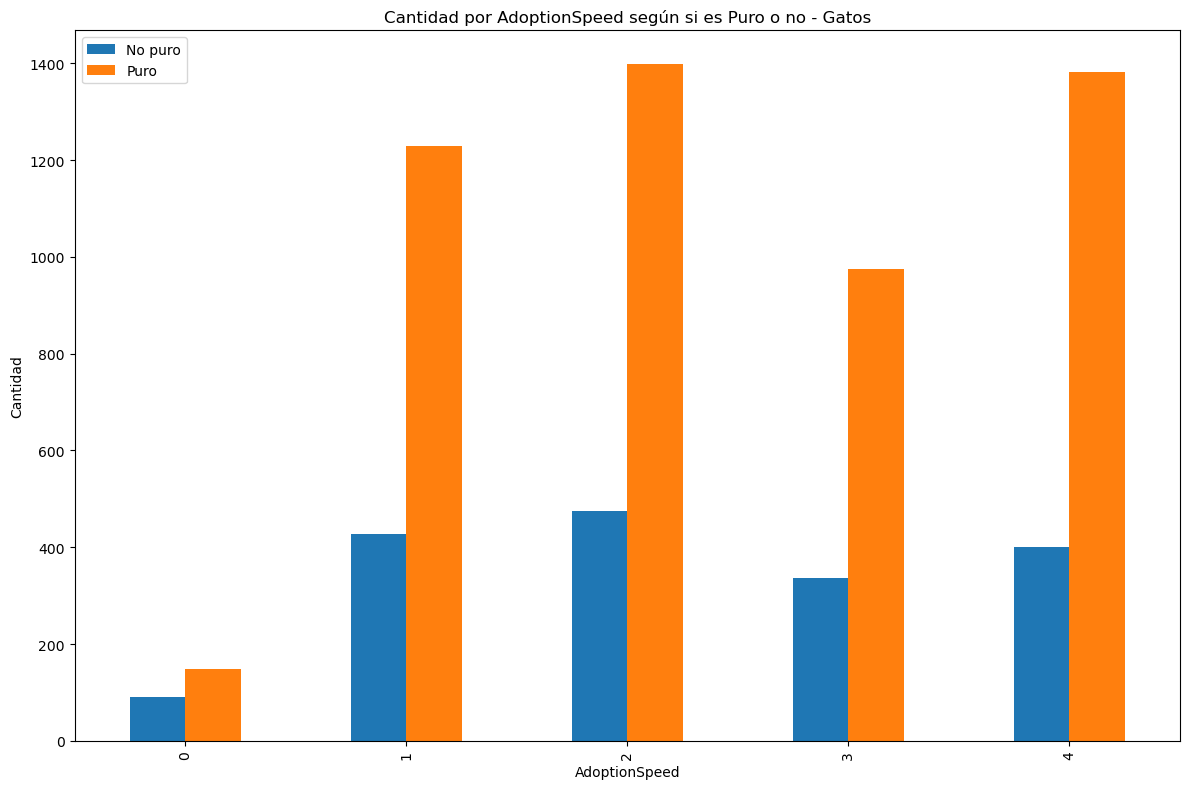

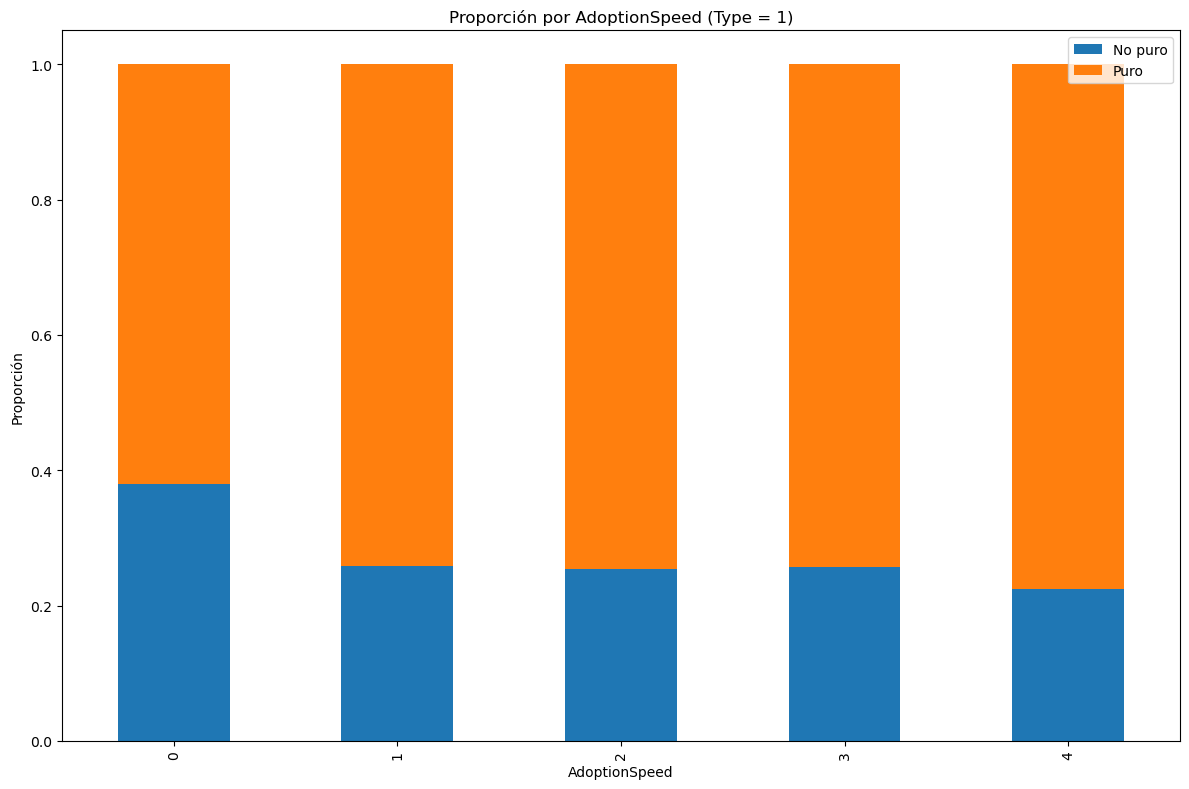

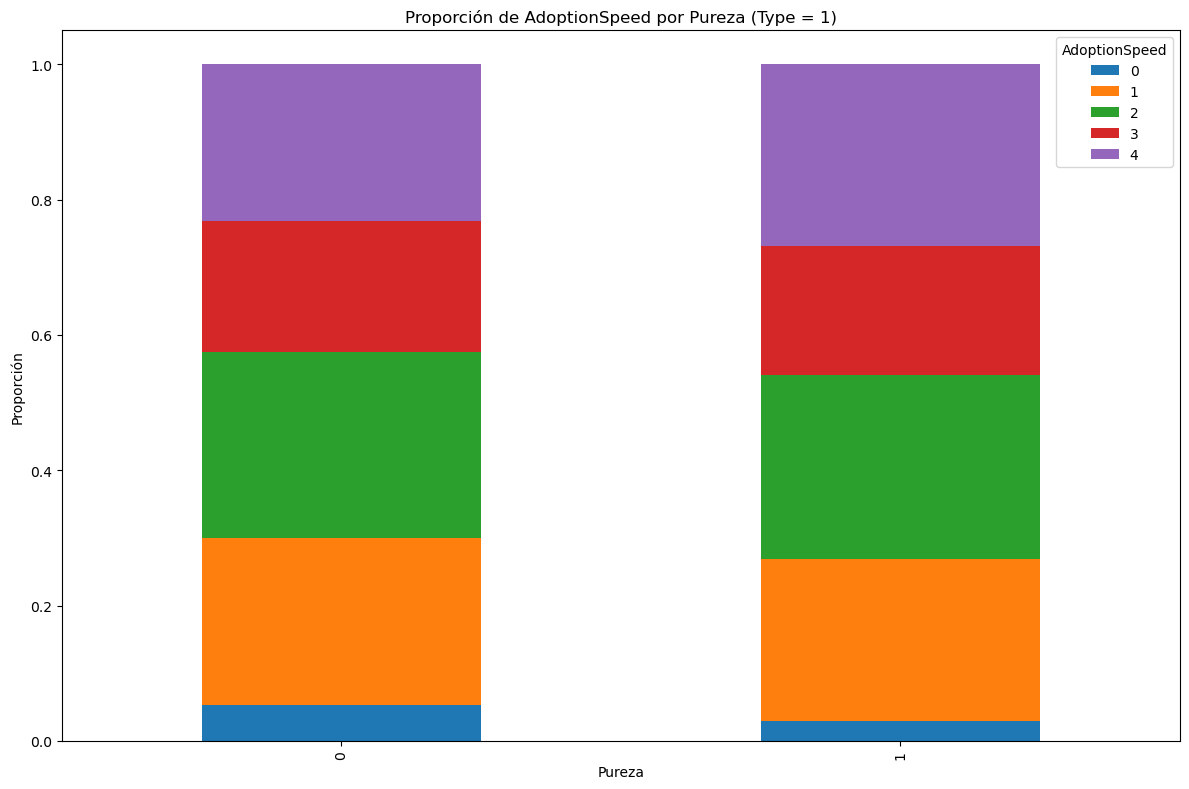

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupamos y contamos
counts = df_cat.groupby(['AdoptionSpeed', 'Puro']).size().unstack(fill_value=0)

# Graficamos
counts.plot(kind='bar', stacked=False)  # stacked=True si querés apiladas
plt.title('Cantidad por AdoptionSpeed según si es Puro o no - Gatos')
plt.xlabel('AdoptionSpeed')
plt.ylabel('Cantidad')
plt.legend(title='Puro')
plt.legend(["No puro", "Puro"])
plt.tight_layout()
plt.show()

# Paso 2: contar por Speed y Puro
counts = df_cat.groupby(['AdoptionSpeed', 'Puro']).size().unstack(fill_value=0)

# Paso 3: calcular proporciones por fila
proportions = counts.div(counts.sum(axis=1), axis=0)

# Paso 4: graficar proporciones apiladas
proportions.plot(kind='bar', stacked=True)

plt.title('Proporción por AdoptionSpeed (Type = 1)')
plt.xlabel('AdoptionSpeed')
plt.ylabel('Proporción')
plt.legend(title='Puro', loc='upper right')
plt.legend(["No puro", "Puro"])
plt.tight_layout()
plt.show()


# Paso 1: contar por Puro y AdoptionSpeed
counts = df_cat.groupby(['Puro', 'AdoptionSpeed']).size().unstack(fill_value=0)

# Paso 2: calcular proporciones por fila (cada barra suma 1)
proportions = counts.div(counts.sum(axis=1), axis=0)

# Paso 3: graficar barras apiladas con Puro en el eje X y segmentos por AdoptionSpeed
proportions.plot(kind='bar', stacked=True)

plt.title('Proporción de AdoptionSpeed por Pureza (Type = 1)')
plt.xlabel('Pureza')
plt.ylabel('Proporción')
plt.legend(title='AdoptionSpeed', loc='upper right')
plt.tight_layout()
plt.show()


# Vamos a analizar segun genero

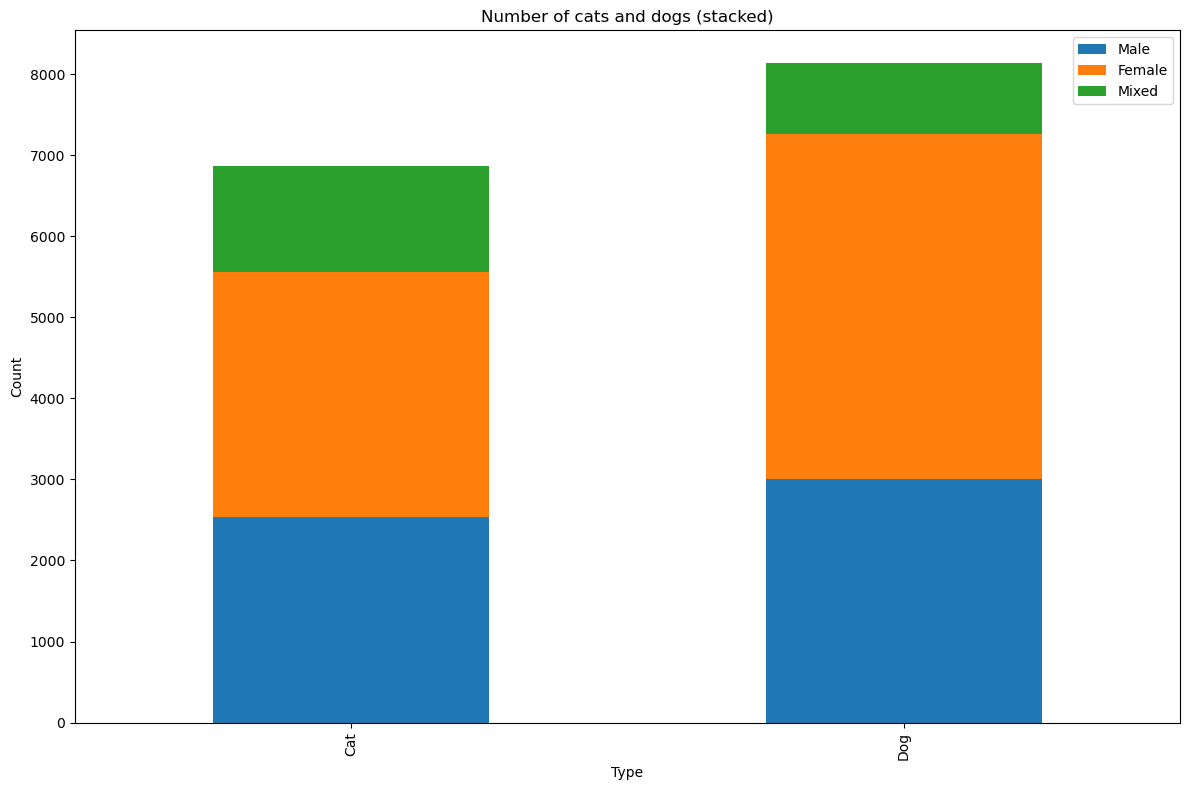

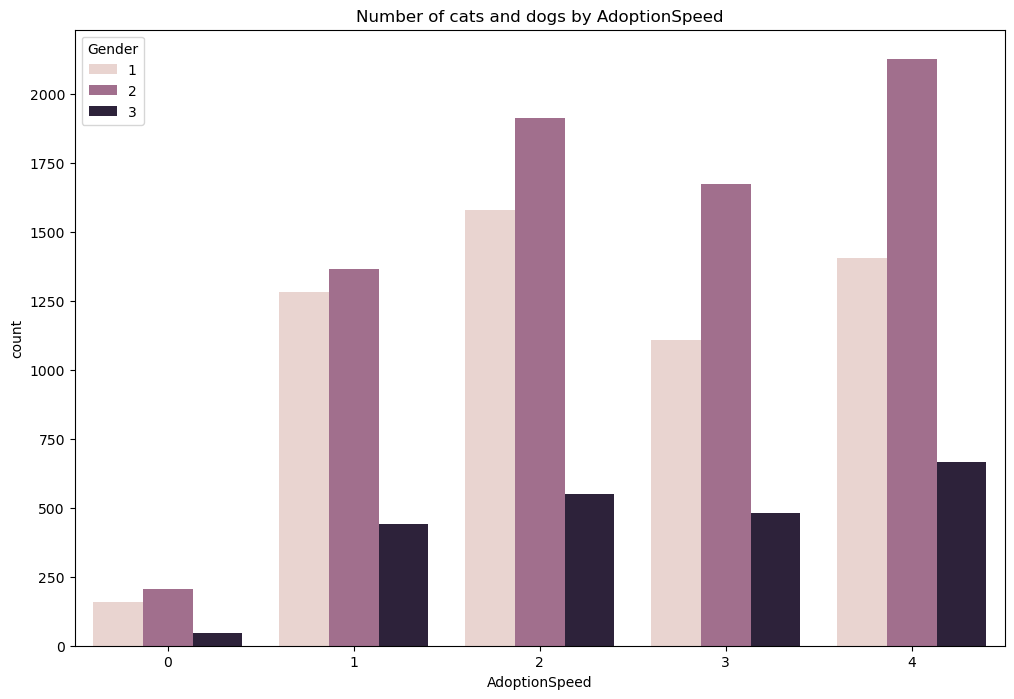

In [21]:
# Paso 1: contar ocurrencias por Type y Puro
conteo = df.groupby(['Type', 'Gender']).size().unstack(fill_value=0)

# Paso 2: graficar
conteo.plot(kind='bar', stacked=True)
plt.title('Number of cats and dogs (stacked)')
plt.xlabel('Type')
plt.ylabel('Count')
plt.legend(title='Puro')
plt.legend(['Male', 'Female', 'Mixed'])
plt.tight_layout()
plt.show()


sns.countplot(x='AdoptionSpeed', data=df, hue='Gender');
plt.title('Number of cats and dogs by AdoptionSpeed');

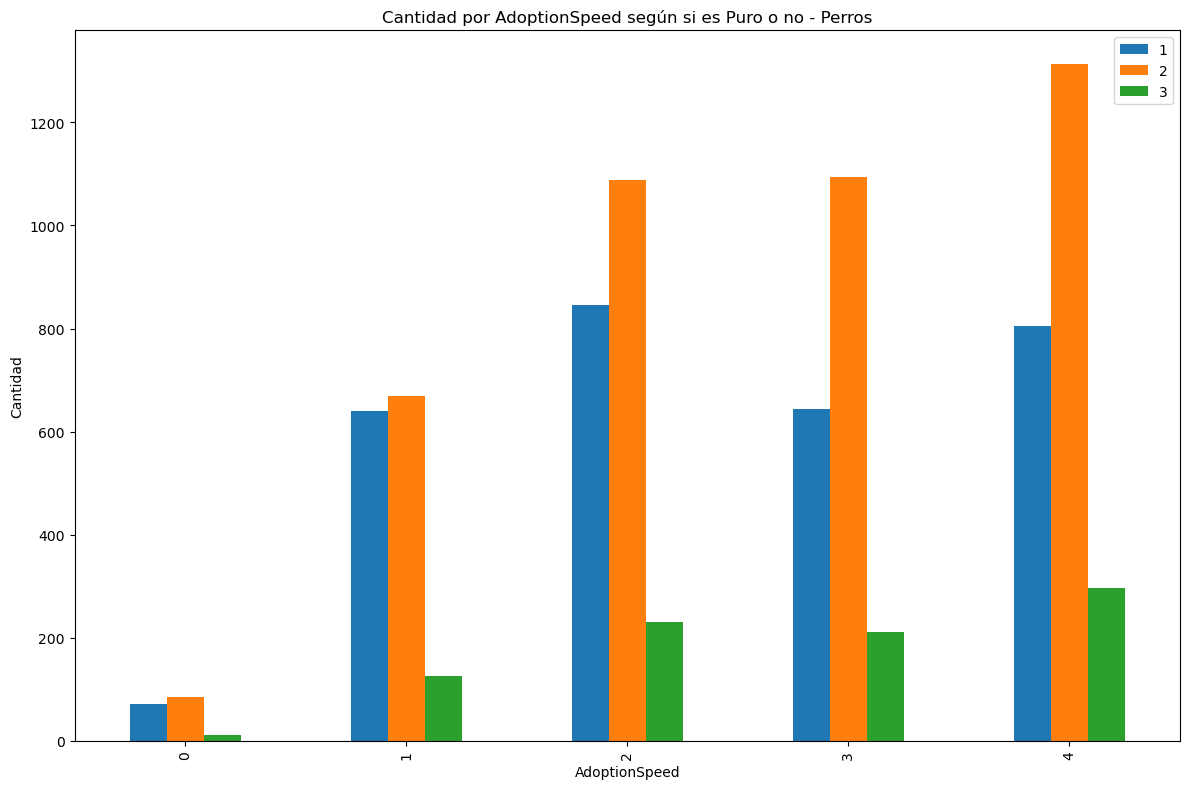

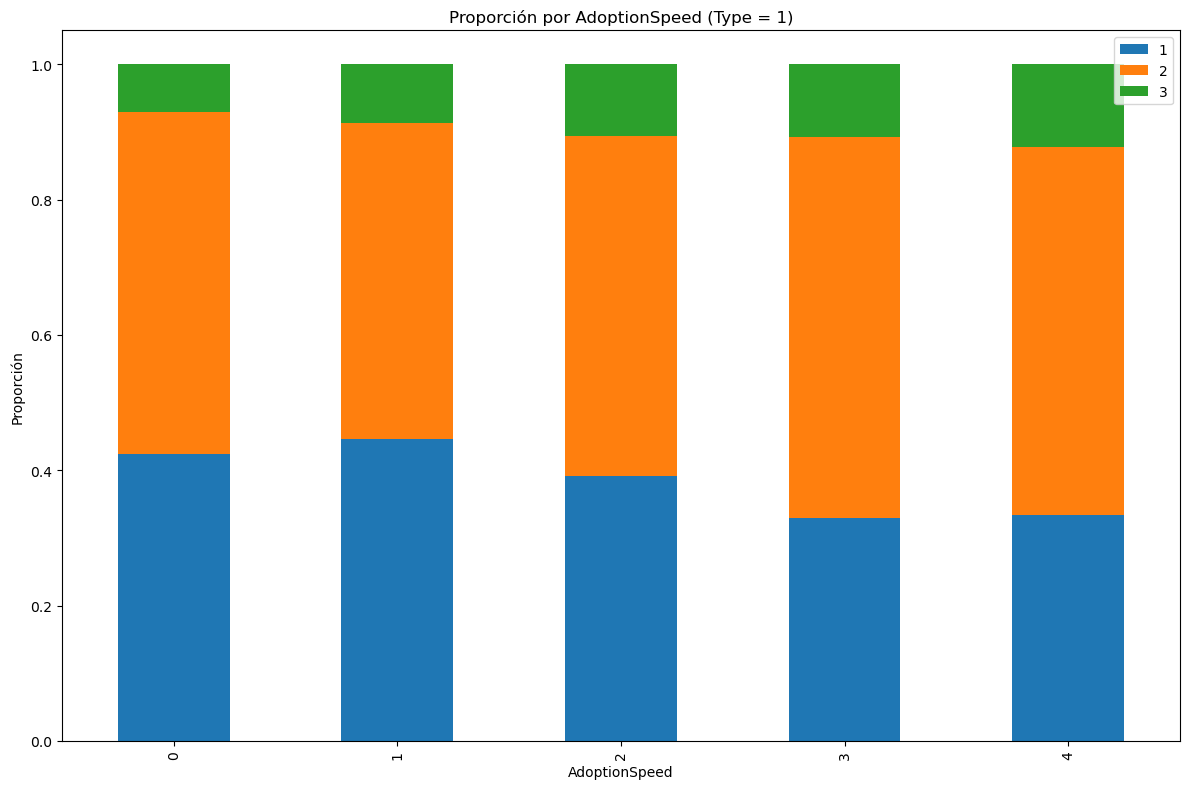

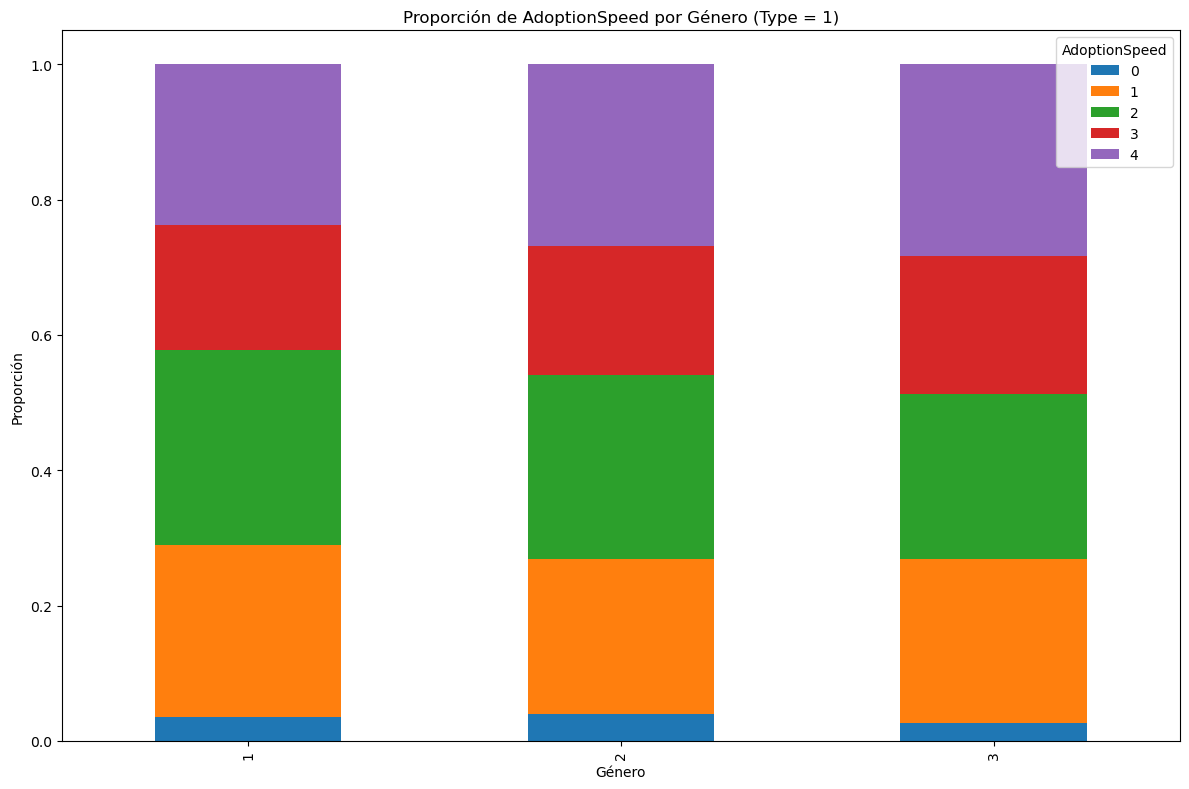

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupamos y contamos
counts = df_dog.groupby(['AdoptionSpeed', 'Gender']).size().unstack(fill_value=0)

# Graficamos
counts.plot(kind='bar', stacked=False)  # stacked=True si querés apiladas
plt.title('Cantidad por AdoptionSpeed según si es Puro o no - Perros')
plt.xlabel('AdoptionSpeed')
plt.ylabel('Cantidad')
plt.legend(title='Gender')
plt.legend()
plt.tight_layout()
plt.show()

# Paso 2: contar por Speed y Puro
counts = df_dog.groupby(['AdoptionSpeed', 'Gender']).size().unstack(fill_value=0)

# Paso 3: calcular proporciones por fila
proportions = counts.div(counts.sum(axis=1), axis=0)

# Paso 4: graficar proporciones apiladas
proportions.plot(kind='bar', stacked=True)

plt.title('Proporción por AdoptionSpeed (Type = 1)')
plt.xlabel('AdoptionSpeed')
plt.ylabel('Proporción')
plt.legend(title='Gender', loc='upper right')
plt.legend()
plt.tight_layout()
plt.show()

# Paso 1: contar por Puro y AdoptionSpeed
counts = df_cat.groupby(['Gender', 'AdoptionSpeed']).size().unstack(fill_value=0)

# Paso 2: calcular proporciones por fila (cada barra suma 1)
proportions = counts.div(counts.sum(axis=1), axis=0)

# Paso 3: graficar barras apiladas con Puro en el eje X y segmentos por AdoptionSpeed
proportions.plot(kind='bar', stacked=True)

plt.title('Proporción de AdoptionSpeed por Género (Type = 1)')
plt.xlabel('Género')
plt.ylabel('Proporción')
plt.legend(title='AdoptionSpeed', loc='upper right')
plt.tight_layout()
plt.show()

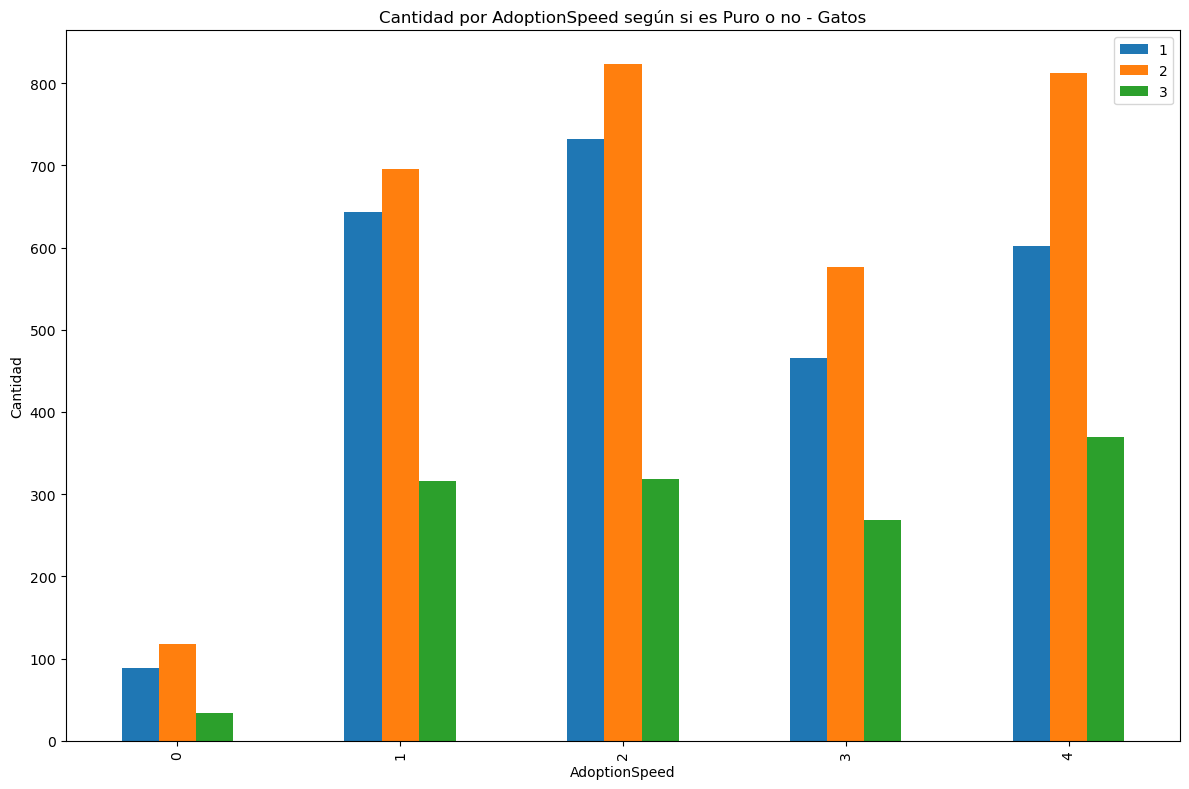

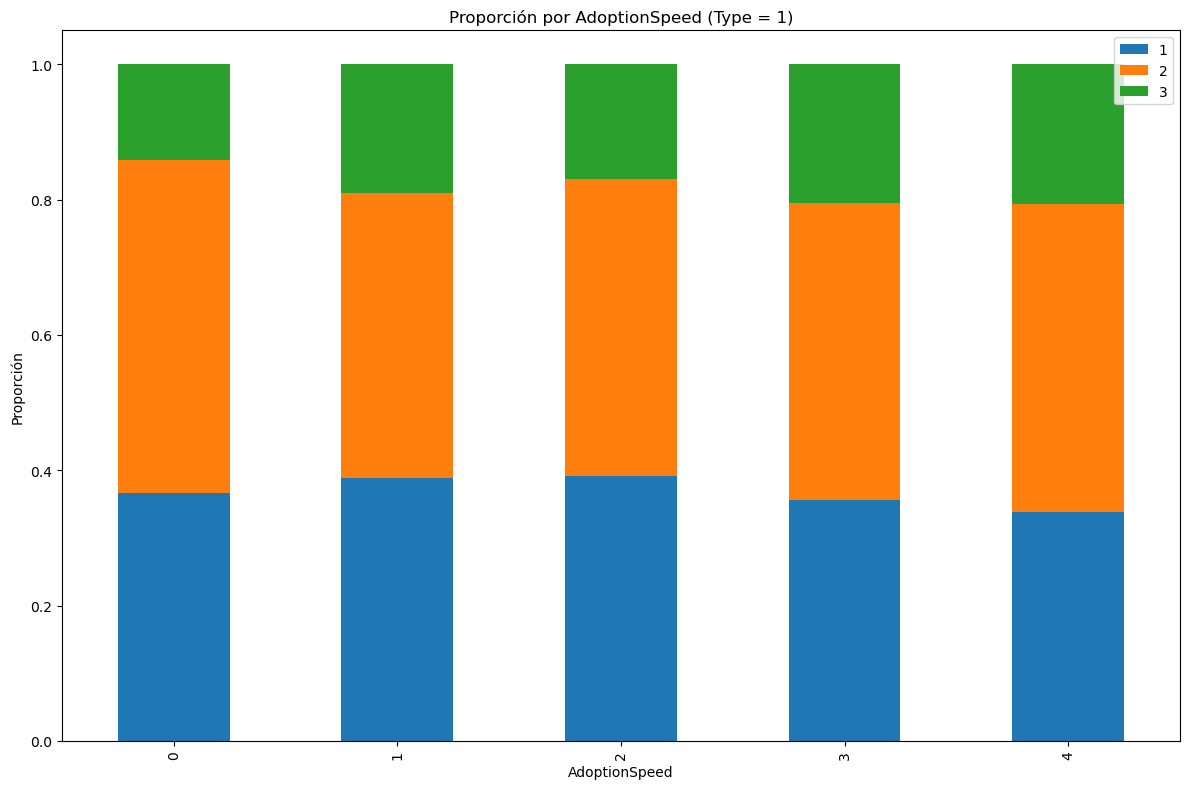

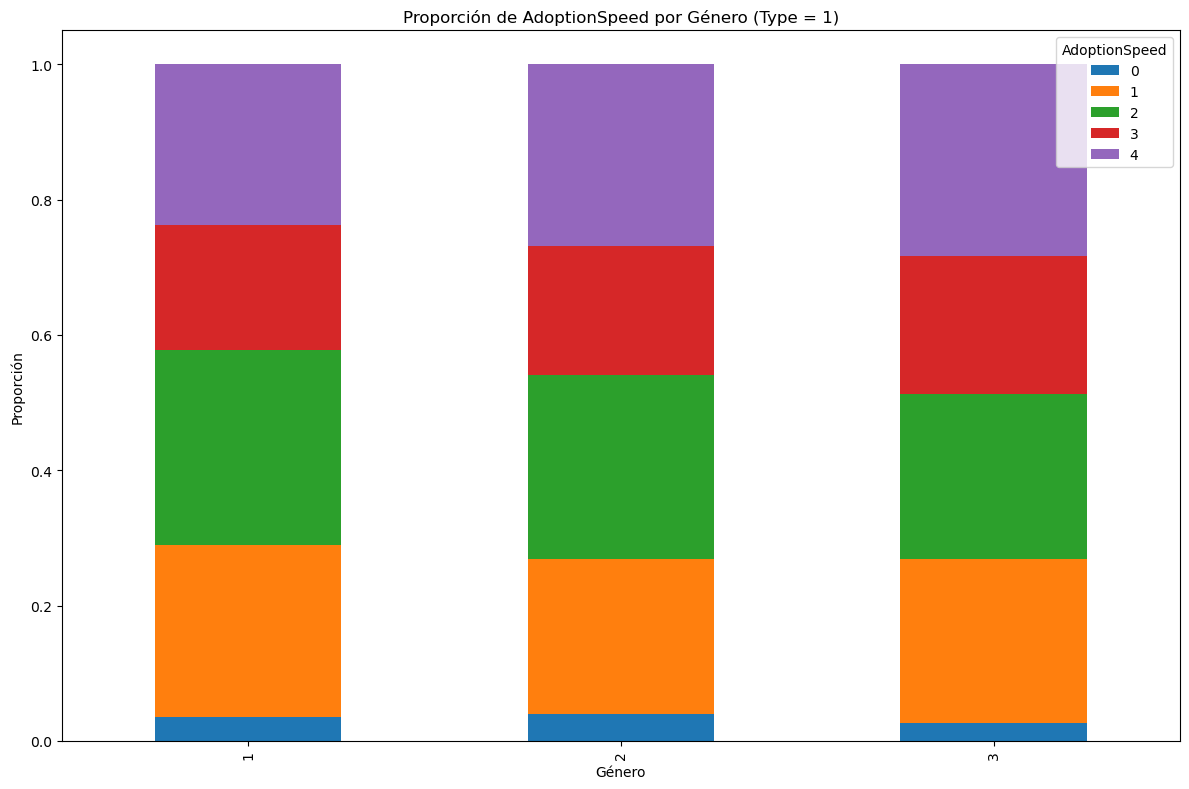

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupamos y contamos
counts = df_cat.groupby(['AdoptionSpeed', 'Gender']).size().unstack(fill_value=0)

# Graficamos
counts.plot(kind='bar', stacked=False)  # stacked=True si querés apiladas
plt.title('Cantidad por AdoptionSpeed según si es Puro o no - Gatos')
plt.xlabel('AdoptionSpeed')
plt.ylabel('Cantidad')
plt.legend(title='Gender')
plt.legend()
plt.tight_layout()
plt.show()

# Paso 2: contar por Speed y Puro
counts = df_cat.groupby(['AdoptionSpeed', 'Gender']).size().unstack(fill_value=0)

# Paso 3: calcular proporciones por fila
proportions = counts.div(counts.sum(axis=1), axis=0)

# Paso 4: graficar proporciones apiladas
proportions.plot(kind='bar', stacked=True)

plt.title('Proporción por AdoptionSpeed (Type = 1)')
plt.xlabel('AdoptionSpeed')
plt.ylabel('Proporción')
plt.legend(title='Gender', loc='upper right')
plt.legend()
plt.tight_layout()
plt.show()

# Paso 1: contar por Puro y AdoptionSpeed
counts = df_cat.groupby(['Gender', 'AdoptionSpeed']).size().unstack(fill_value=0)

# Paso 2: calcular proporciones por fila (cada barra suma 1)
proportions = counts.div(counts.sum(axis=1), axis=0)

# Paso 3: graficar barras apiladas con Puro en el eje X y segmentos por AdoptionSpeed
proportions.plot(kind='bar', stacked=True)

plt.title('Proporción de AdoptionSpeed por Género (Type = 1)')
plt.xlabel('Género')
plt.ylabel('Proporción')
plt.legend(title='AdoptionSpeed', loc='upper right')
plt.tight_layout()
plt.show()

# Colores

## Perros

In [24]:
df_dog

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Puro
2,Dog,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,0
3,Dog,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,0
4,Dog,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,0
7,Dog,Siu Pak & Her 6 Puppies,0,307,0,2,1,2,7,2,1,2,2,2,1,6,0,41326,1fba5f6e5480946254590d48f9c5198d,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,3,0
10,Dog,Bear,2,307,0,1,1,2,7,2,1,2,1,2,1,1,0,41401,9238e4f44c71a75282e62f7136c6b240,0,"For serious adopter, please do sms or call for...",8b693ca84,7.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14983,Dog,Alger,3,307,0,1,1,2,7,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,He is very intelligent and cute. Fluffy and lo...,cca88204d,7.0,2,0
14984,Dog,NaN,60,307,0,2,2,5,0,2,2,3,3,3,1,1,0,41324,c8ea0bc42e630c72747986c4c0ce36aa,0,"abandoned,but healthy",f5dc70d35,1.0,4,0
14985,Dog,Terry,24,179,307,1,2,3,7,2,2,3,3,2,1,1,0,41326,719987dce7aeb027fdfa91b480800199,0,been at my place for a while..am hoping to fin...,e7f7066b6,0.0,4,0
14987,Dog,Snowy,6,195,0,2,1,7,0,1,3,1,1,2,1,1,0,41401,79309f4027f2fedb4349a298c69fe56f,0,ooooo,4d163b731,1.0,0,1


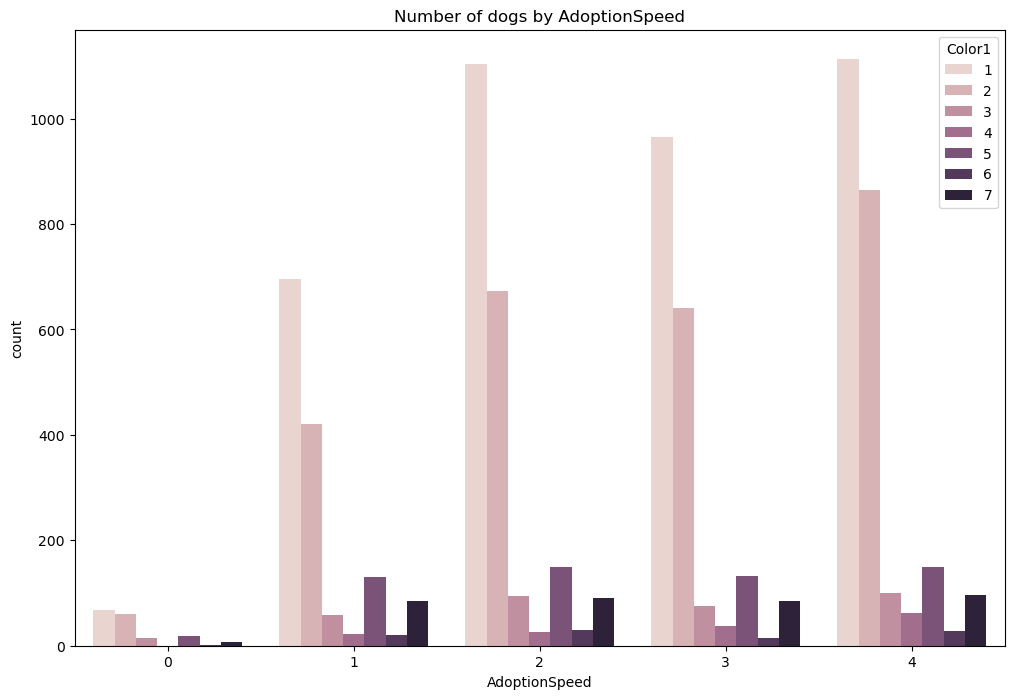

In [25]:
sns.countplot(x='AdoptionSpeed', data=df_dog, hue='Color1');
plt.title('Number of dogs by AdoptionSpeed');

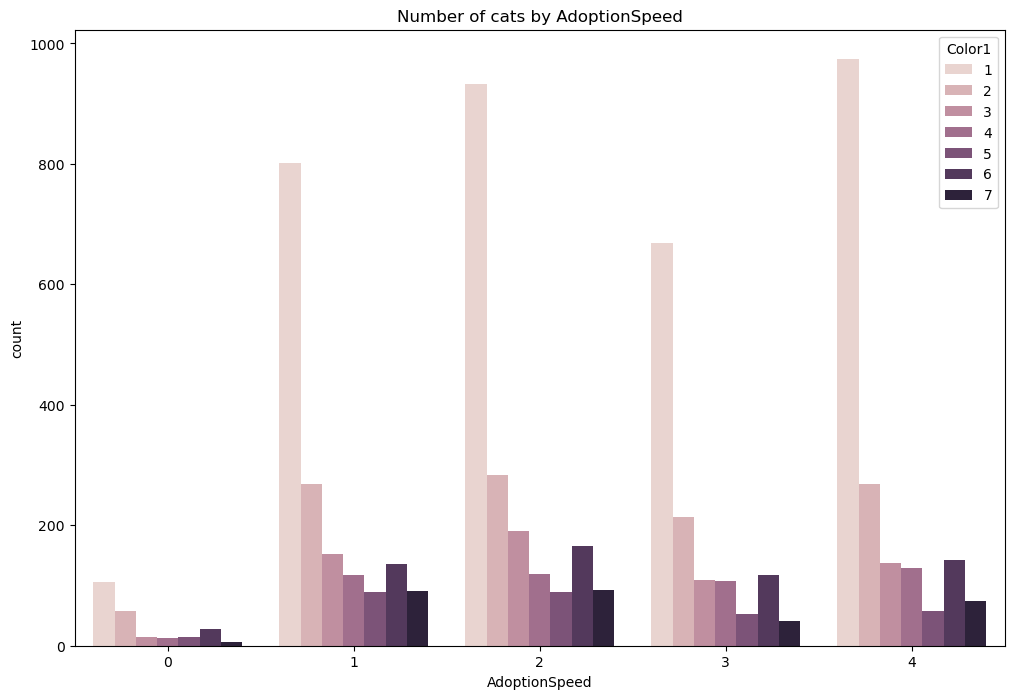

In [26]:
sns.countplot(x='AdoptionSpeed', data=df_cat, hue='Color1');
plt.title('Number of cats by AdoptionSpeed');

## 1 color vs 2 colores vs 3 colores

In [27]:
def color_checker(row):
    if row.Color3 != 0:
        return 3
    else:
        if row.Color2 != 0:
            return 2
        else:
            return 1
        
df["Color_comb"] = df.apply(color_checker, axis=1)

df_dog = df[df['Type'] == "Dog"]
df_cat = df[df['Type'] == "Cat"]

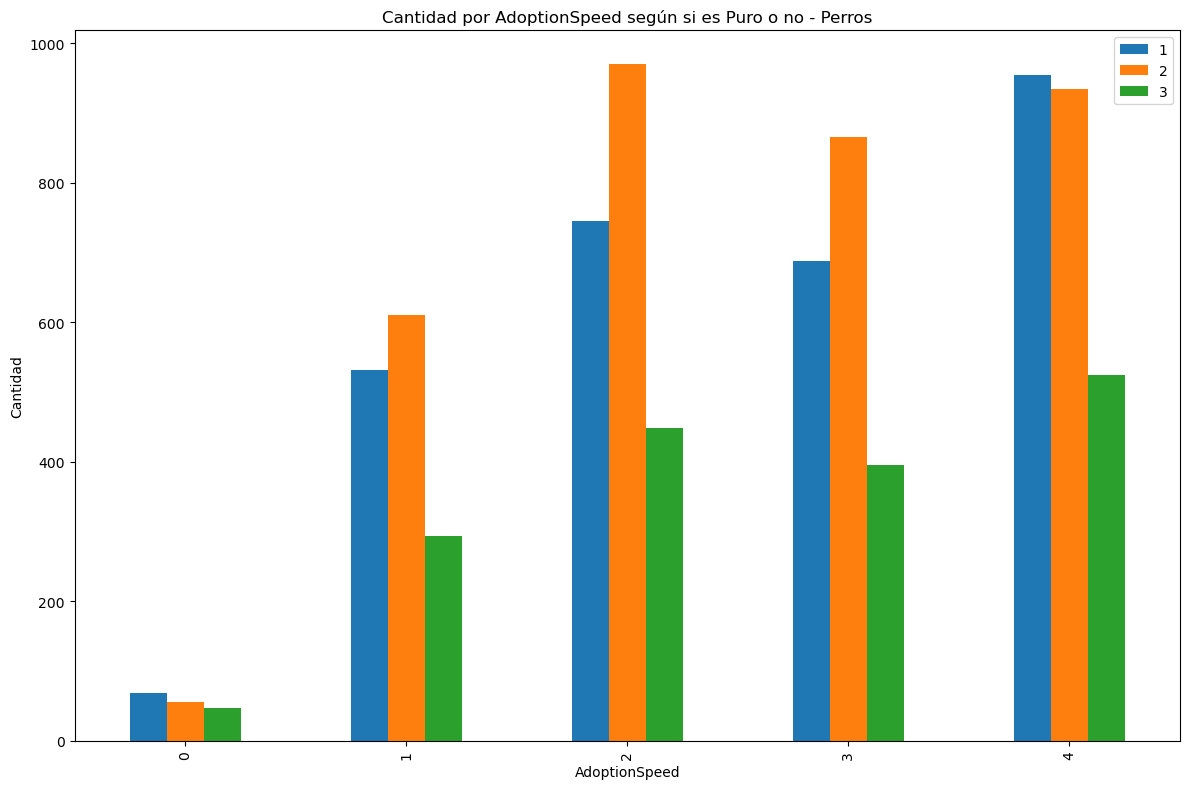

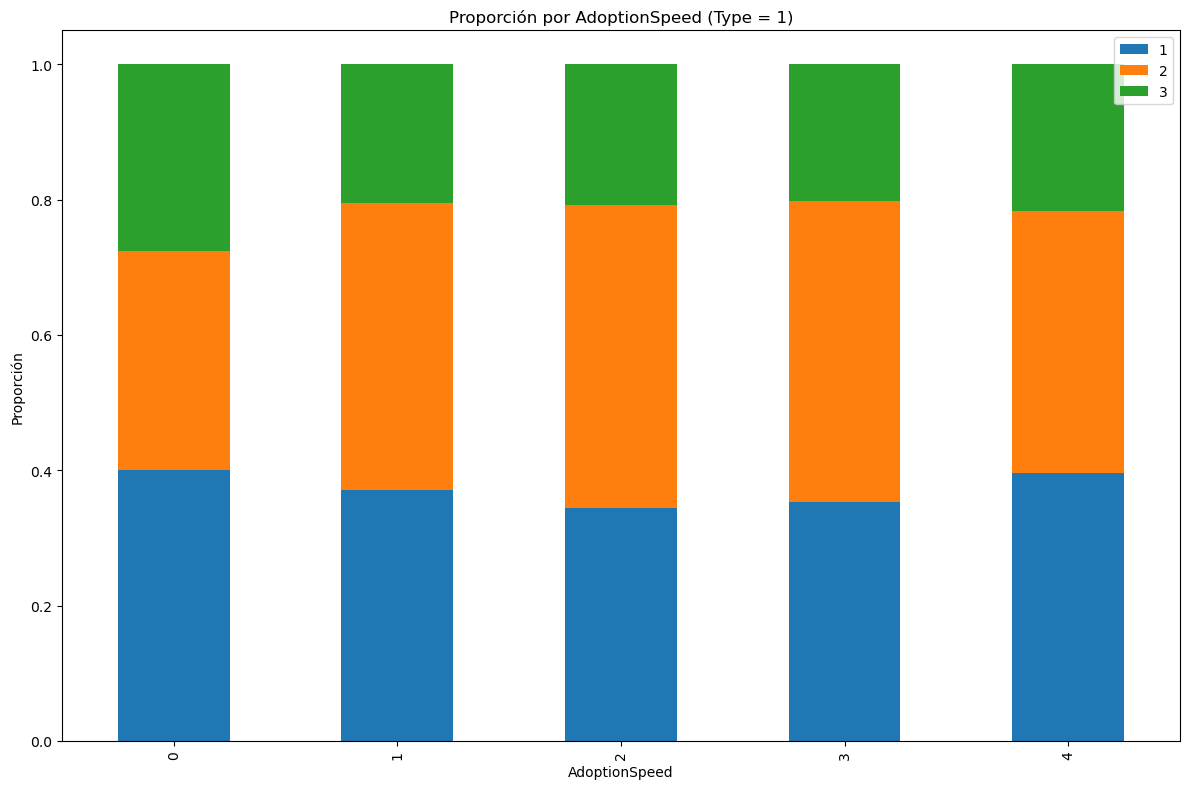

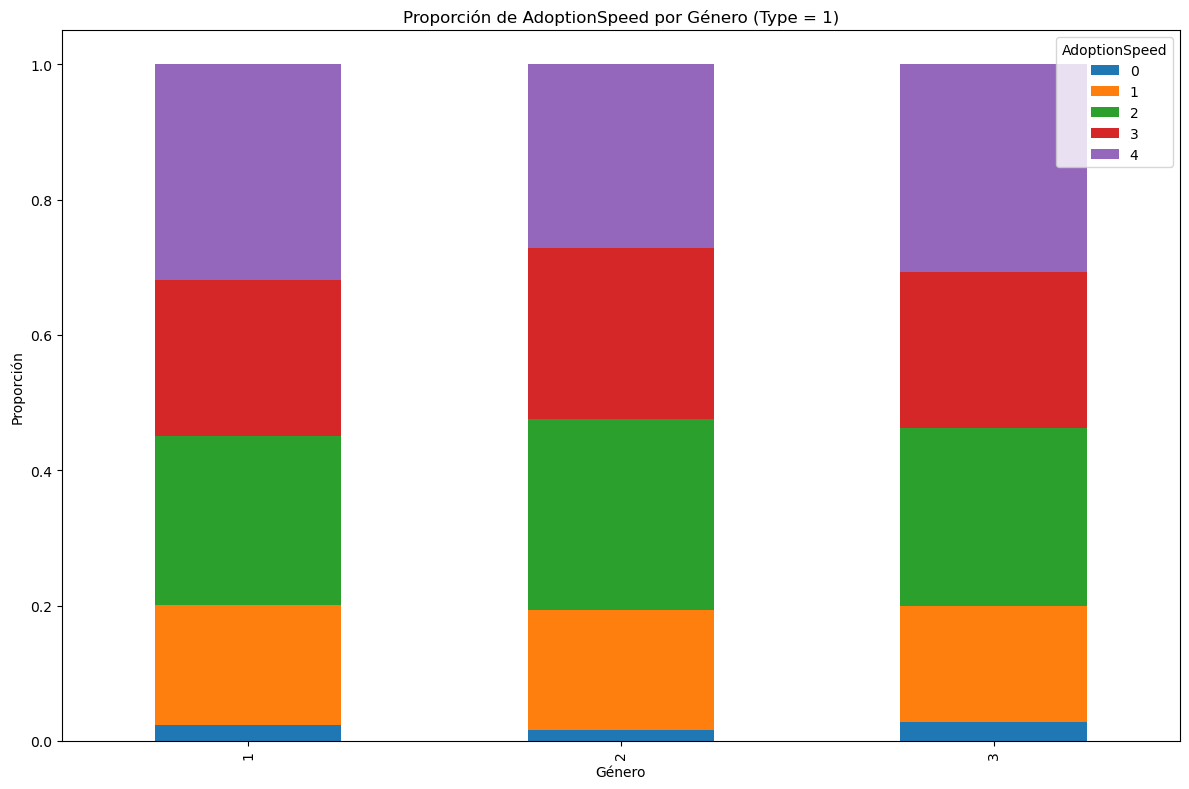

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupamos y contamos
counts = df_dog.groupby(['AdoptionSpeed', 'Color_comb']).size().unstack(fill_value=0)

# Graficamos
counts.plot(kind='bar', stacked=False)  # stacked=True si querés apiladas
plt.title('Cantidad por AdoptionSpeed según si es Puro o no - Perros')
plt.xlabel('AdoptionSpeed')
plt.ylabel('Cantidad')
plt.legend(title='Gender')
plt.legend()
plt.tight_layout()
plt.show()

# Paso 2: contar por Speed y Puro
counts = df_dog.groupby(['AdoptionSpeed', 'Color_comb']).size().unstack(fill_value=0)

# Paso 3: calcular proporciones por fila
proportions = counts.div(counts.sum(axis=1), axis=0)

# Paso 4: graficar proporciones apiladas
proportions.plot(kind='bar', stacked=True)

plt.title('Proporción por AdoptionSpeed (Type = 1)')
plt.xlabel('AdoptionSpeed')
plt.ylabel('Proporción')
plt.legend(title='Gender', loc='upper right')
plt.legend()
plt.tight_layout()
plt.show()

# Paso 1: contar por Puro y AdoptionSpeed
counts = df_dog.groupby(['Color_comb', 'AdoptionSpeed']).size().unstack(fill_value=0)

# Paso 2: calcular proporciones por fila (cada barra suma 1)
proportions = counts.div(counts.sum(axis=1), axis=0)

# Paso 3: graficar barras apiladas con Puro en el eje X y segmentos por AdoptionSpeed
proportions.plot(kind='bar', stacked=True)

plt.title('Proporción de AdoptionSpeed por Género (Type = 1)')
plt.xlabel('Género')
plt.ylabel('Proporción')
plt.legend(title='AdoptionSpeed', loc='upper right')
plt.tight_layout()
plt.show()


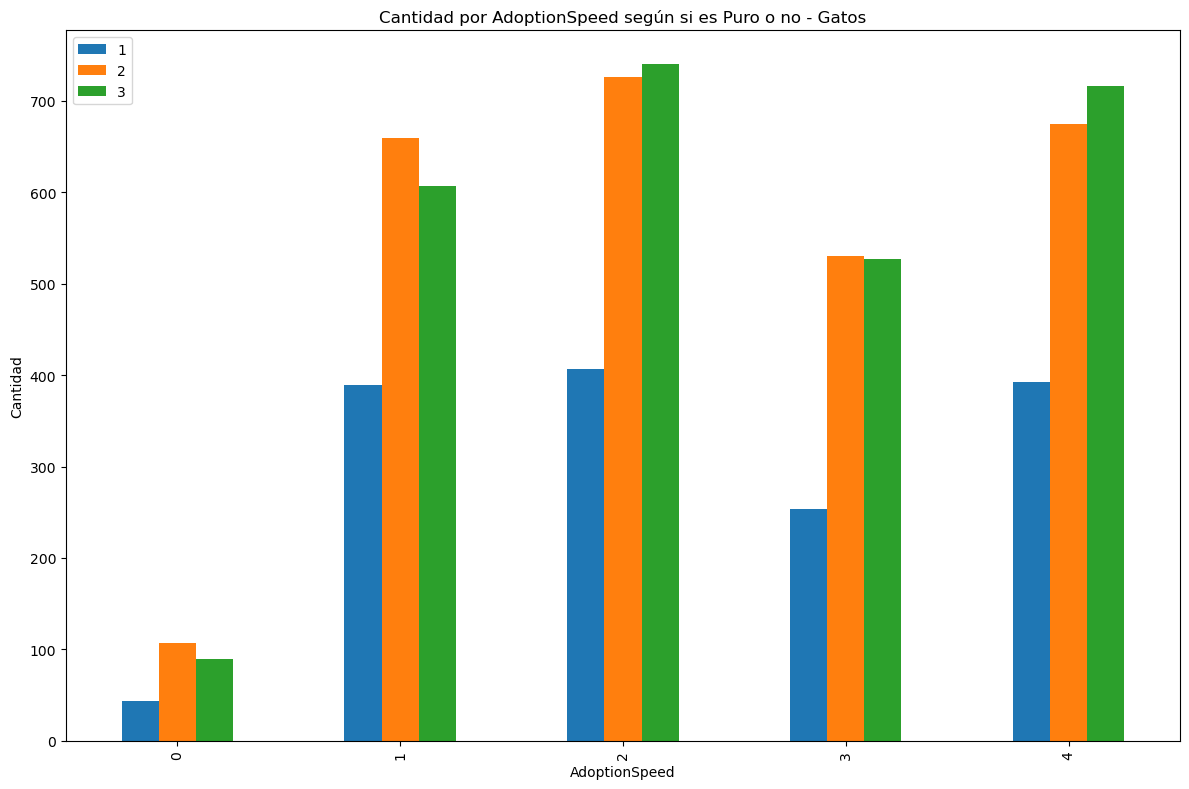

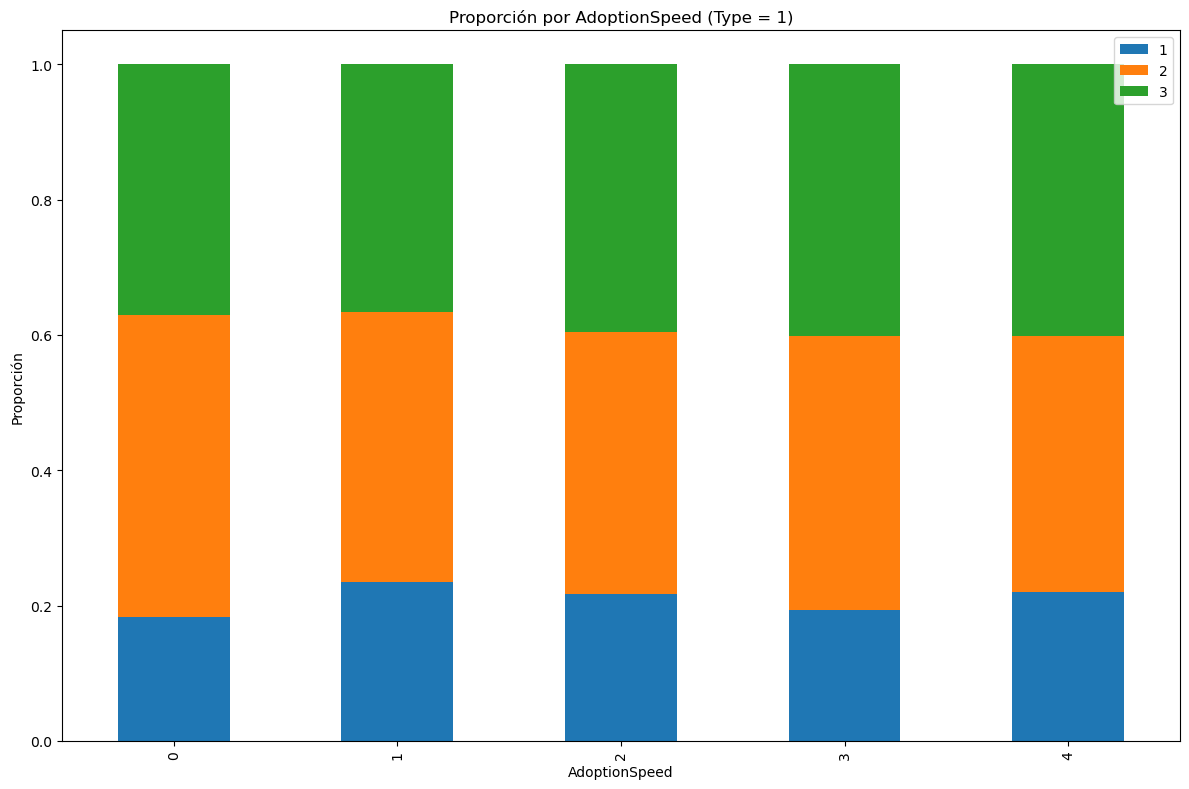

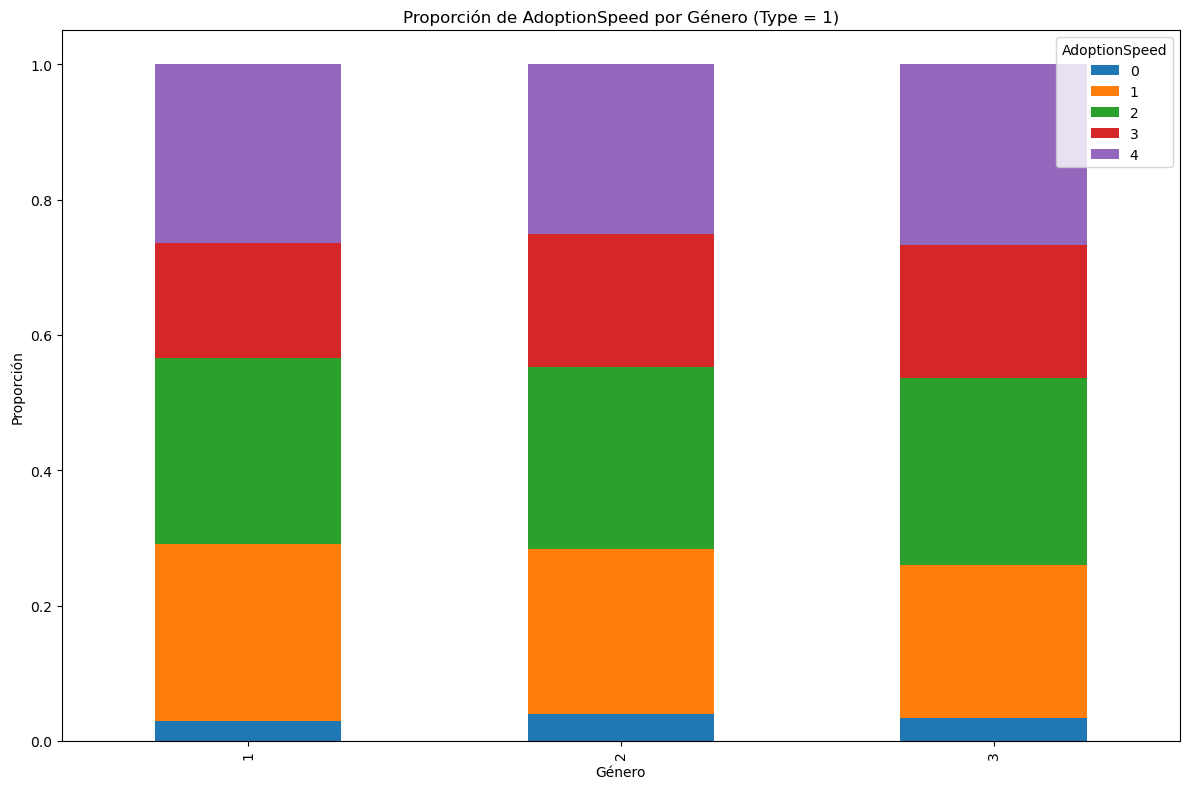

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupamos y contamos
counts = df_cat.groupby(['AdoptionSpeed', 'Color_comb']).size().unstack(fill_value=0)

# Graficamos
counts.plot(kind='bar', stacked=False)  # stacked=True si querés apiladas
plt.title('Cantidad por AdoptionSpeed según si es Puro o no - Gatos')
plt.xlabel('AdoptionSpeed')
plt.ylabel('Cantidad')
plt.legend(title='Gender')
plt.legend()
plt.tight_layout()
plt.show()

# Paso 2: contar por Speed y Puro
counts = df_cat.groupby(['AdoptionSpeed', 'Color_comb']).size().unstack(fill_value=0)

# Paso 3: calcular proporciones por fila
proportions = counts.div(counts.sum(axis=1), axis=0)

# Paso 4: graficar proporciones apiladas
proportions.plot(kind='bar', stacked=True)

plt.title('Proporción por AdoptionSpeed (Type = 1)')
plt.xlabel('AdoptionSpeed')
plt.ylabel('Proporción')
plt.legend(title='Gender', loc='upper right')
plt.legend()
plt.tight_layout()
plt.show()

# Paso 1: contar por Puro y AdoptionSpeed
counts = df_cat.groupby(['Color_comb', 'AdoptionSpeed']).size().unstack(fill_value=0)

# Paso 2: calcular proporciones por fila (cada barra suma 1)
proportions = counts.div(counts.sum(axis=1), axis=0)

# Paso 3: graficar barras apiladas con Puro en el eje X y segmentos por AdoptionSpeed
proportions.plot(kind='bar', stacked=True)

plt.title('Proporción de AdoptionSpeed por Género (Type = 1)')
plt.xlabel('Género')
plt.ylabel('Proporción')
plt.legend(title='AdoptionSpeed', loc='upper right')
plt.tight_layout()
plt.show()

## variables de Salud: Vacunación, Esterilización, Desparacitación

### Vemos como está la vacunación

([<matplotlib.patches.Wedge at 0x253d9c16d20>,
 [Text(0.062084346406863646, 1.0982465724650512, '2'),
  Text(-0.4763670897833804, -0.9915010820827747, '1'),
  Text(1.0168069229241286, -0.41964709160622754, '3')])

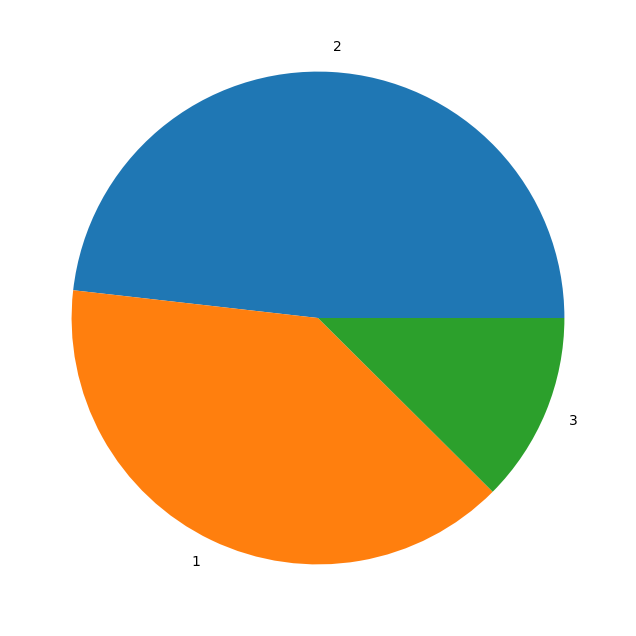

In [49]:
counts = df["Vaccinated"].value_counts()
labels = counts.index
sizes = counts.values

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

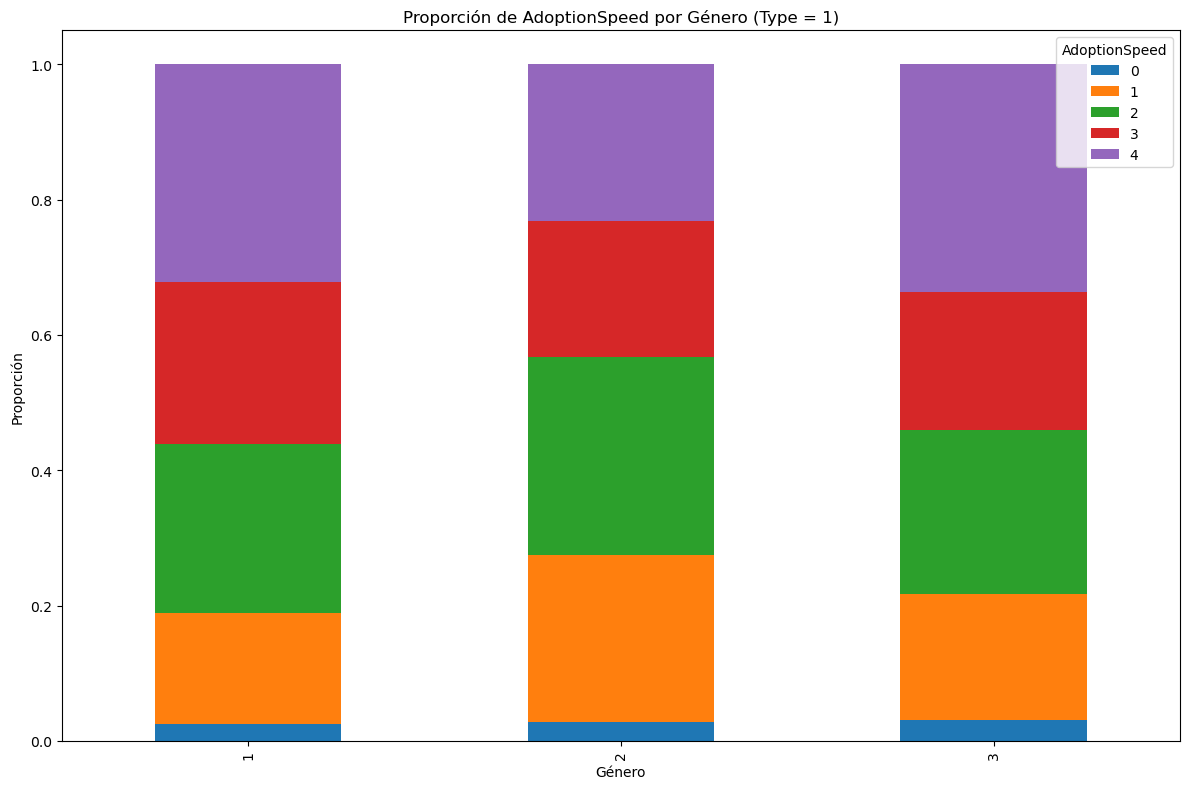

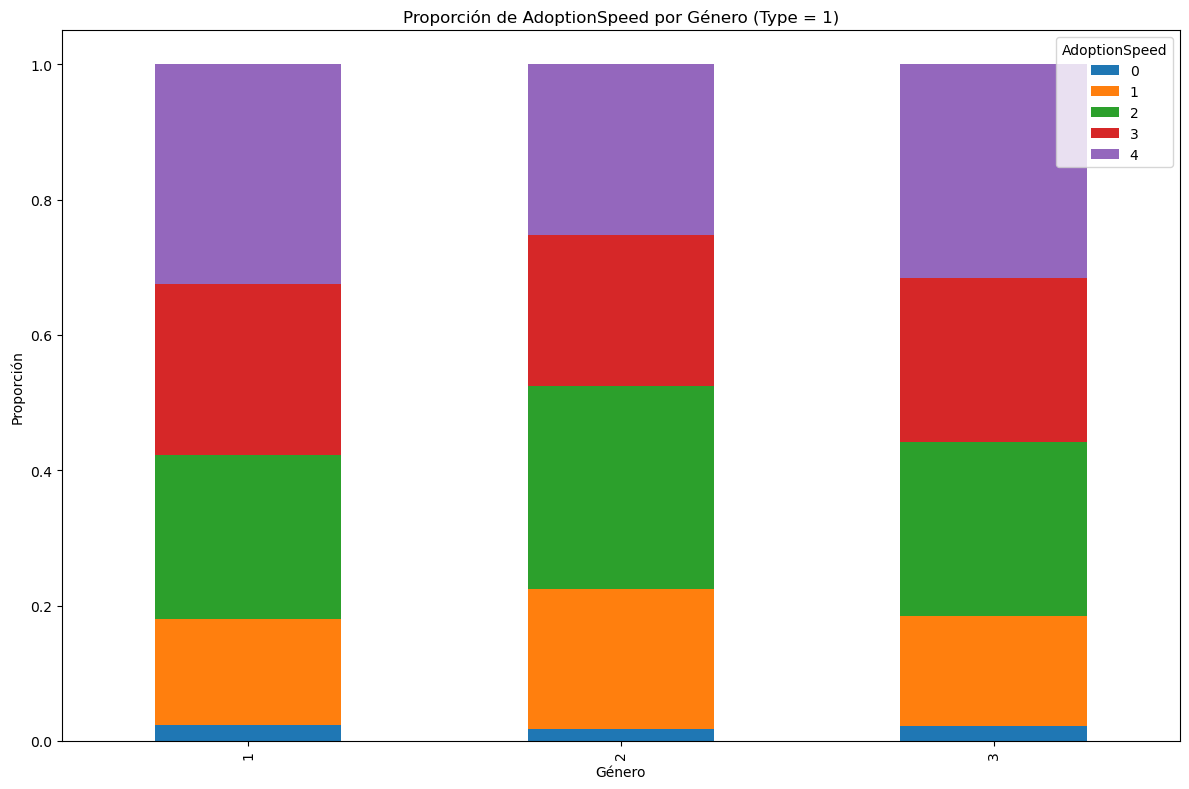

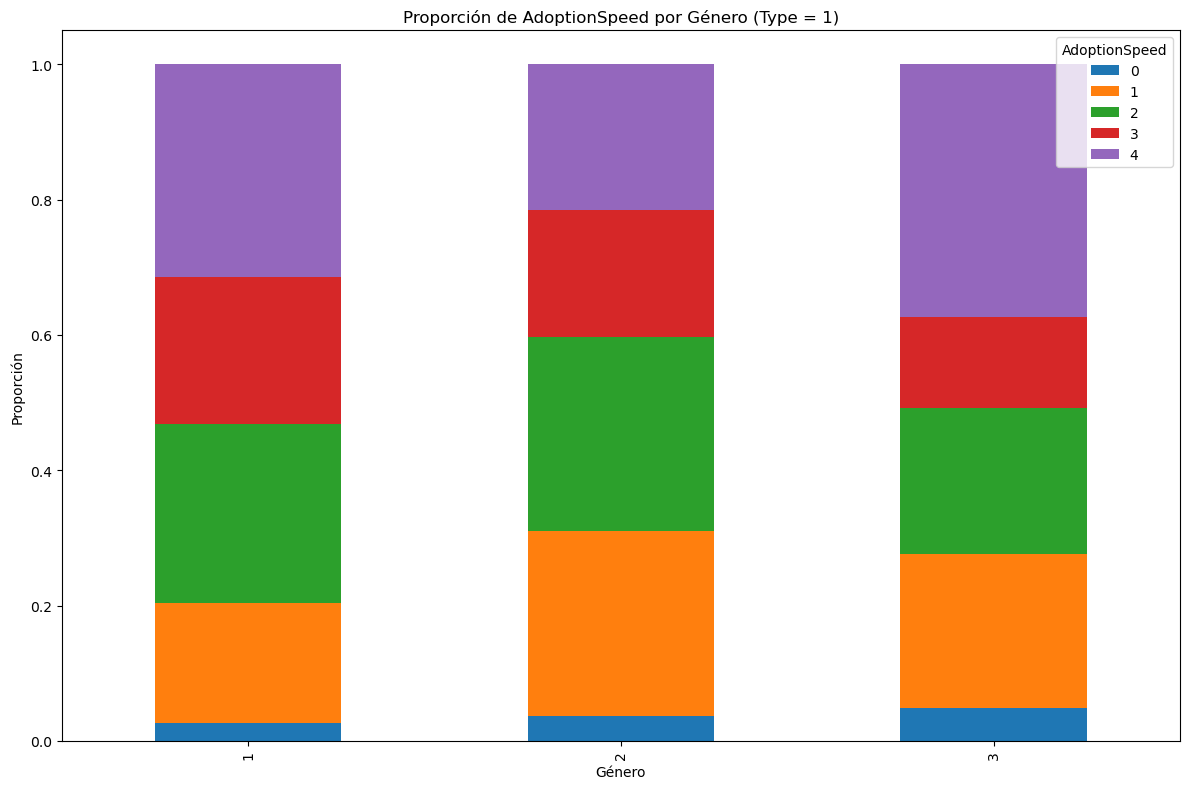

In [35]:
# Paso 1: contar por Puro y AdoptionSpeed
counts = df.groupby(['Vaccinated', 'AdoptionSpeed']).size().unstack(fill_value=0)

# Paso 2: calcular proporciones por fila (cada barra suma 1)
proportions = counts.div(counts.sum(axis=1), axis=0)

# Paso 3: graficar barras apiladas con Puro en el eje X y segmentos por AdoptionSpeed
proportions.plot(kind='bar', stacked=True)

plt.title('Proporción de AdoptionSpeed por Género (Type = 1)')
plt.xlabel('Género')
plt.ylabel('Proporción')
plt.legend(title='AdoptionSpeed', loc='upper right')
plt.tight_layout()
plt.show()

# Paso 1: contar por Puro y AdoptionSpeed
counts = df_dog.groupby(['Vaccinated', 'AdoptionSpeed']).size().unstack(fill_value=0)

# Paso 2: calcular proporciones por fila (cada barra suma 1)
proportions = counts.div(counts.sum(axis=1), axis=0)

# Paso 3: graficar barras apiladas con Puro en el eje X y segmentos por AdoptionSpeed
proportions.plot(kind='bar', stacked=True)

plt.title('Proporción de AdoptionSpeed por Género (Type = 1)')
plt.xlabel('Género')
plt.ylabel('Proporción')
plt.legend(title='AdoptionSpeed', loc='upper right')
plt.tight_layout()
plt.show()

# Paso 1: contar por Puro y AdoptionSpeed
counts = df_cat.groupby(['Vaccinated', 'AdoptionSpeed']).size().unstack(fill_value=0)

# Paso 2: calcular proporciones por fila (cada barra suma 1)
proportions = counts.div(counts.sum(axis=1), axis=0)

# Paso 3: graficar barras apiladas con Puro en el eje X y segmentos por AdoptionSpeed
proportions.plot(kind='bar', stacked=True)

plt.title('Proporción de AdoptionSpeed por Género (Type = 1)')
plt.xlabel('Género')
plt.ylabel('Proporción')
plt.legend(title='AdoptionSpeed', loc='upper right')
plt.tight_layout()
plt.show()

### Desparacitación

([<matplotlib.patches.Wedge at 0x253dc44fd10>,
 [Text(-0.20632764830517503, 1.08047623830645, '1'),
  Text(-0.201798165371147, -1.0813313555302275, '2'),
  Text(1.024287493512603, -0.40104255464186067, '3')])

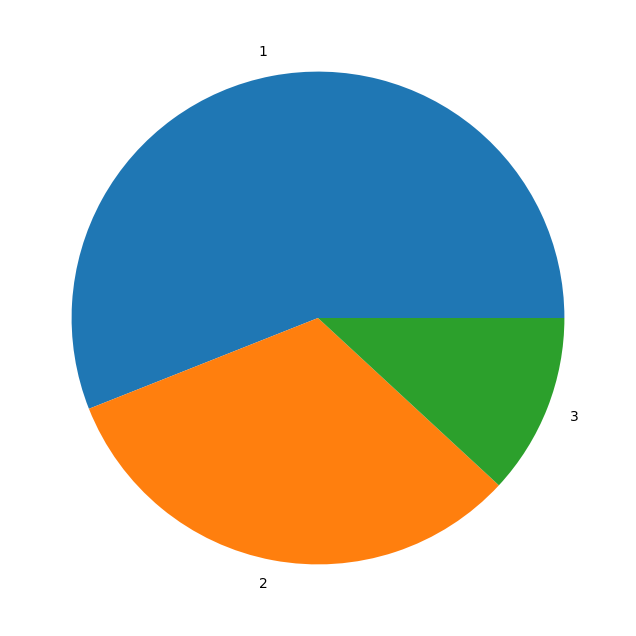

In [51]:
counts = df["Dewormed"].value_counts()
labels = counts.index
sizes = counts.values

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

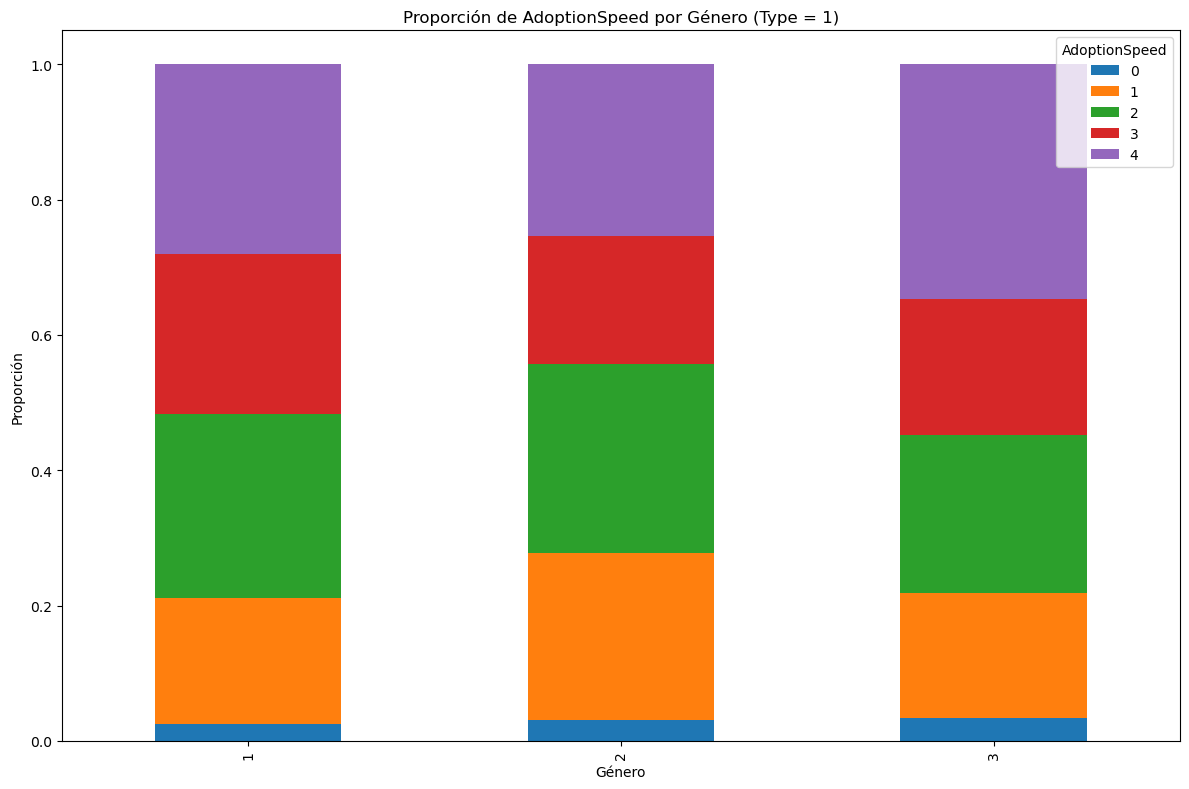

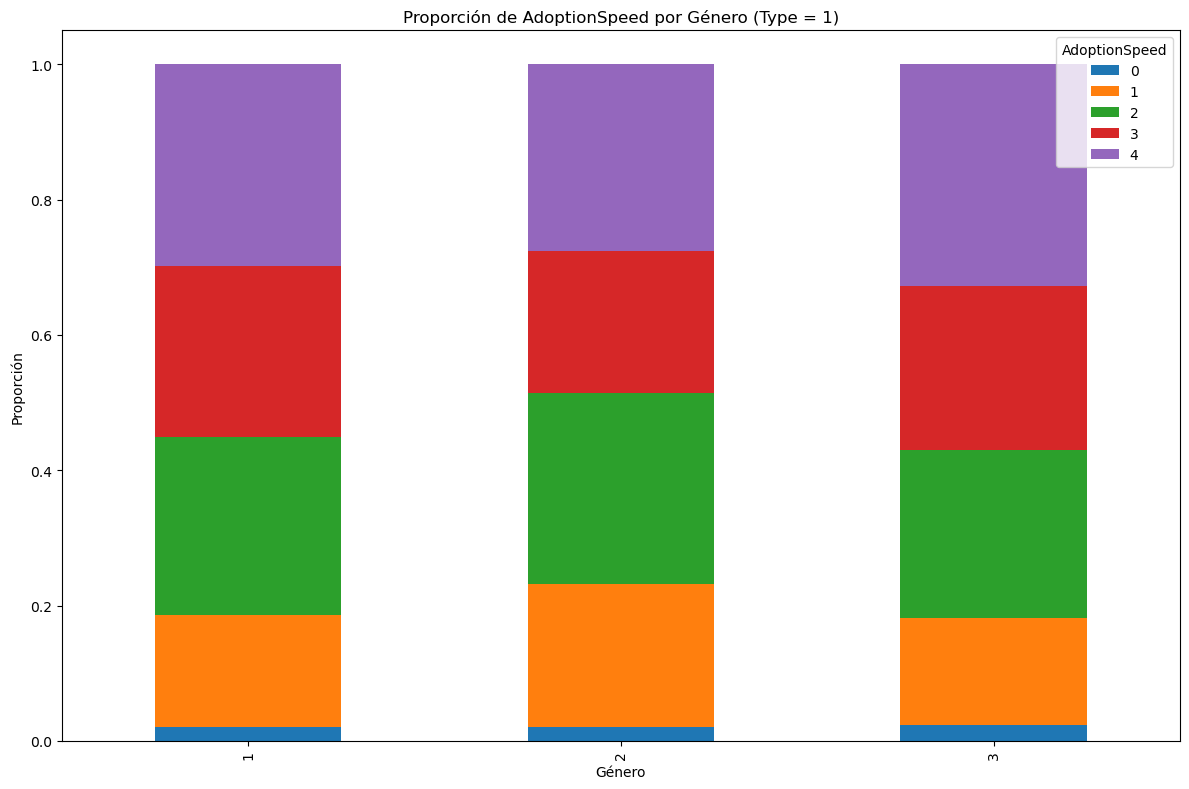

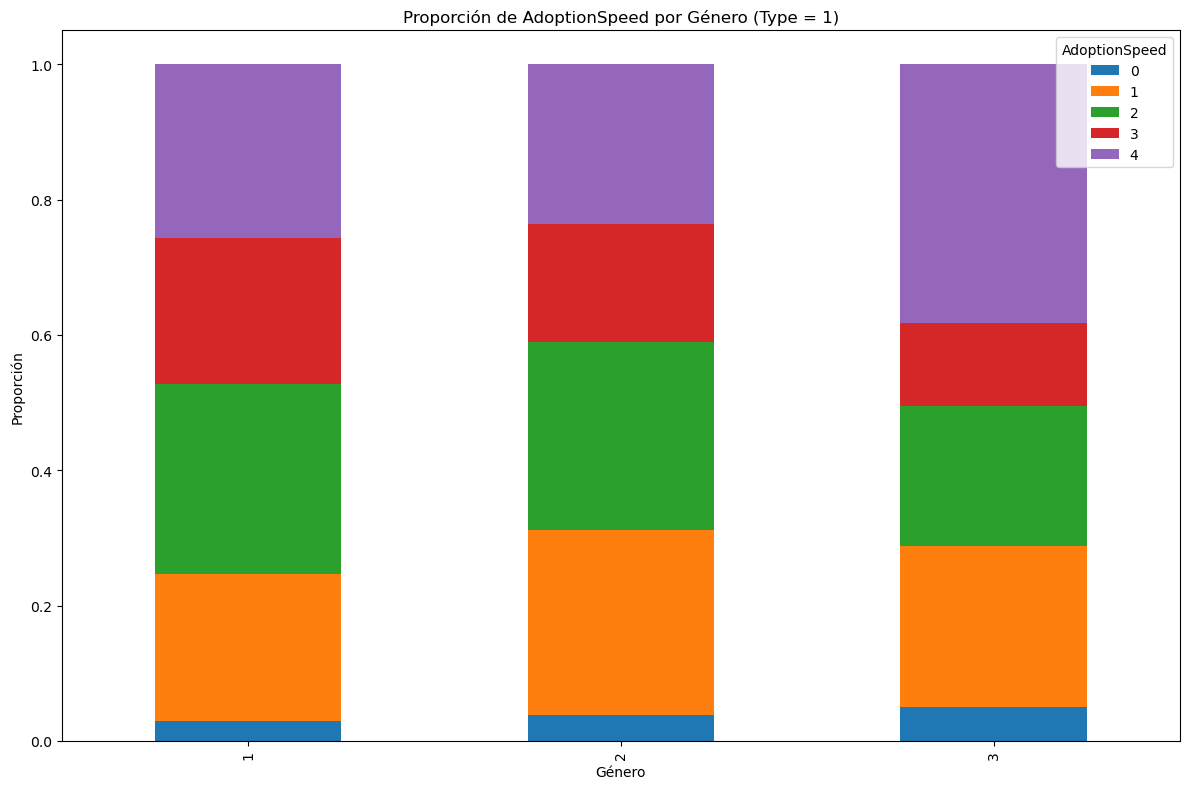

In [52]:
# Paso 1: contar por Puro y AdoptionSpeed
counts = df.groupby(['Dewormed', 'AdoptionSpeed']).size().unstack(fill_value=0)

# Paso 2: calcular proporciones por fila (cada barra suma 1)
proportions = counts.div(counts.sum(axis=1), axis=0)

# Paso 3: graficar barras apiladas con Puro en el eje X y segmentos por AdoptionSpeed
proportions.plot(kind='bar', stacked=True)

plt.title('Proporción de AdoptionSpeed por Género (Type = 1)')
plt.xlabel('Género')
plt.ylabel('Proporción')
plt.legend(title='AdoptionSpeed', loc='upper right')
plt.tight_layout()
plt.show()

# Paso 1: contar por Puro y AdoptionSpeed
counts = df_dog.groupby(['Dewormed', 'AdoptionSpeed']).size().unstack(fill_value=0)

# Paso 2: calcular proporciones por fila (cada barra suma 1)
proportions = counts.div(counts.sum(axis=1), axis=0)

# Paso 3: graficar barras apiladas con Puro en el eje X y segmentos por AdoptionSpeed
proportions.plot(kind='bar', stacked=True)

plt.title('Proporción de AdoptionSpeed por Género (Type = 1)')
plt.xlabel('Género')
plt.ylabel('Proporción')
plt.legend(title='AdoptionSpeed', loc='upper right')
plt.tight_layout()
plt.show()

# Paso 1: contar por Puro y AdoptionSpeed
counts = df_cat.groupby(['Dewormed', 'AdoptionSpeed']).size().unstack(fill_value=0)

# Paso 2: calcular proporciones por fila (cada barra suma 1)
proportions = counts.div(counts.sum(axis=1), axis=0)

# Paso 3: graficar barras apiladas con Puro en el eje X y segmentos por AdoptionSpeed
proportions.plot(kind='bar', stacked=True)

plt.title('Proporción de AdoptionSpeed por Género (Type = 1)')
plt.xlabel('Género')
plt.ylabel('Proporción')
plt.legend(title='AdoptionSpeed', loc='upper right')
plt.tight_layout()
plt.show()

### Esterilización

([<matplotlib.patches.Wedge at 0x253d7ea93d0>,
 [Text(-0.5662202621562634, 0.9430772050705565, '2'),
  Text(0.17568531111085509, -1.0858796763269318, '1'),
  Text(1.0214045123826523, -0.4083293059337728, '3')])

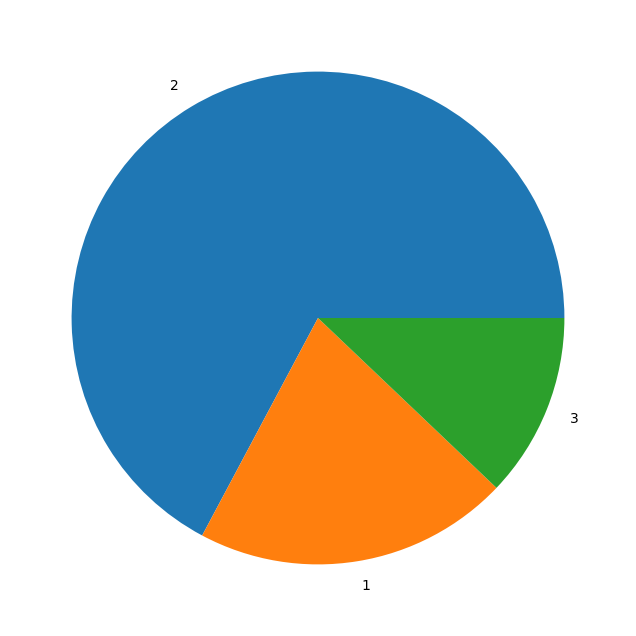

In [54]:
counts = df["Sterilized"].value_counts()
labels = counts.index
sizes = counts.values

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

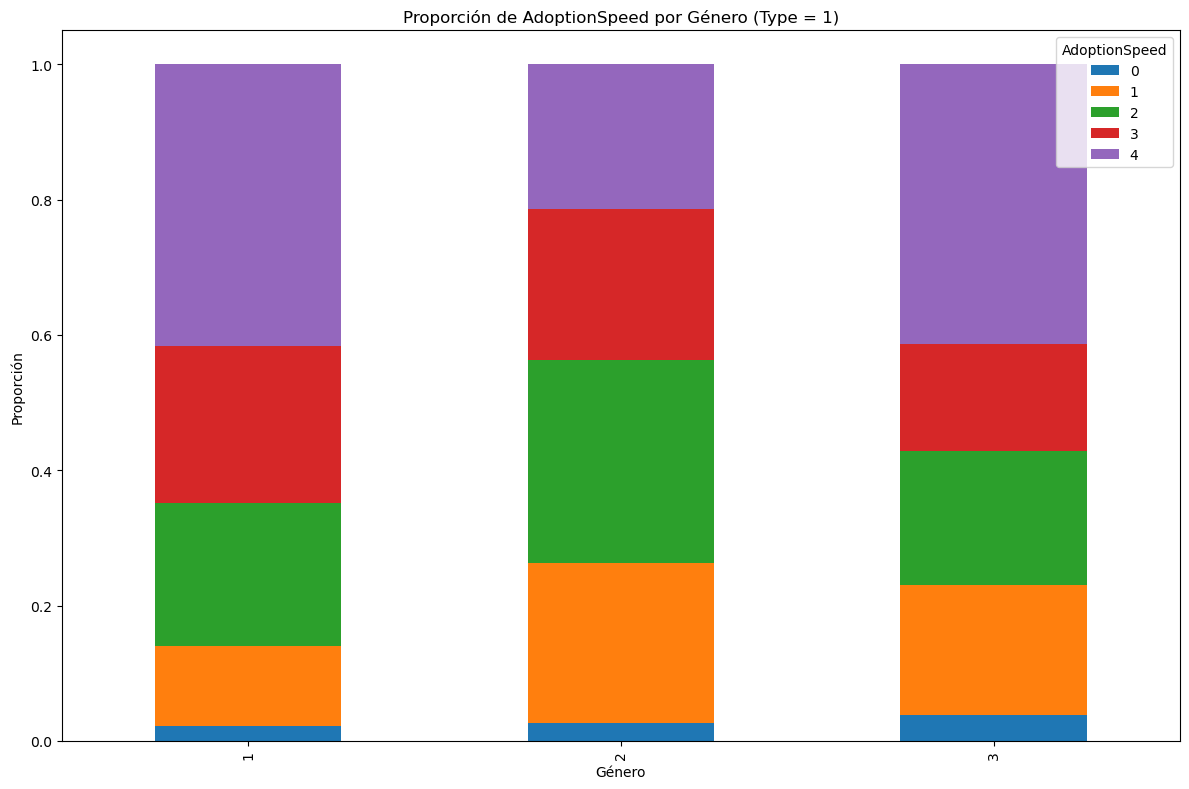

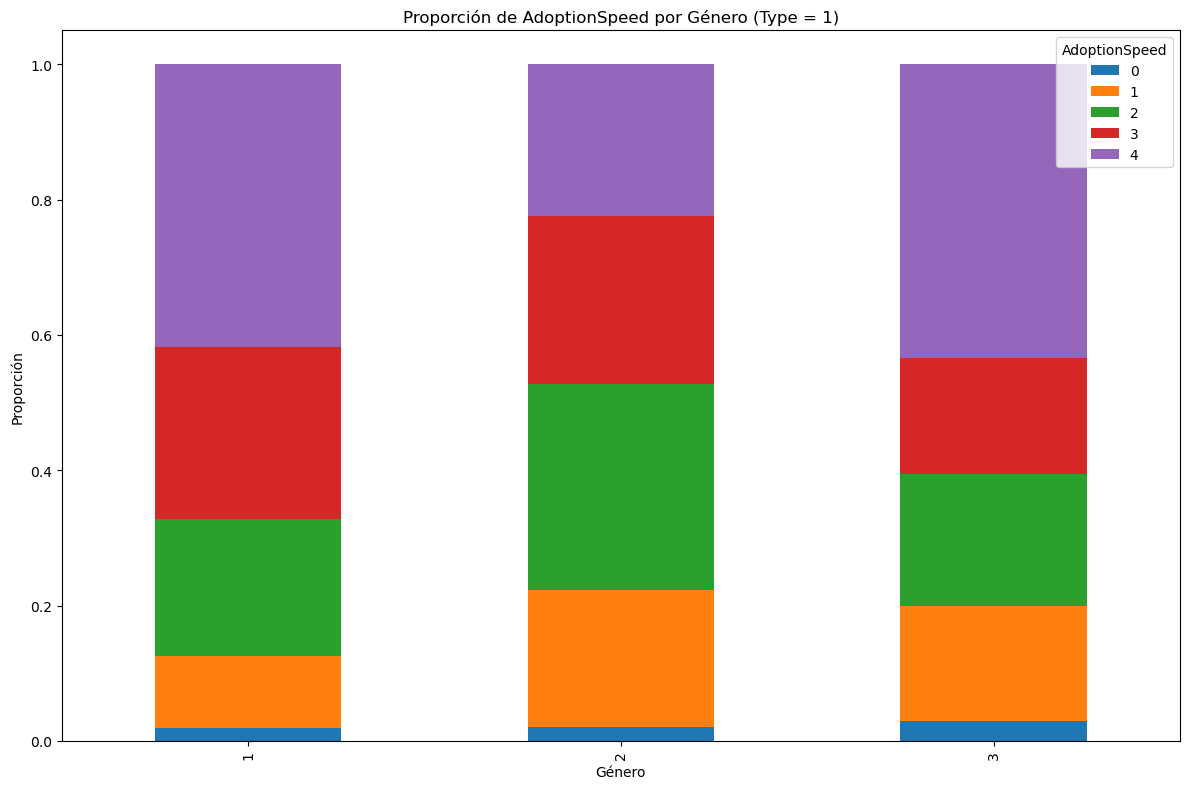

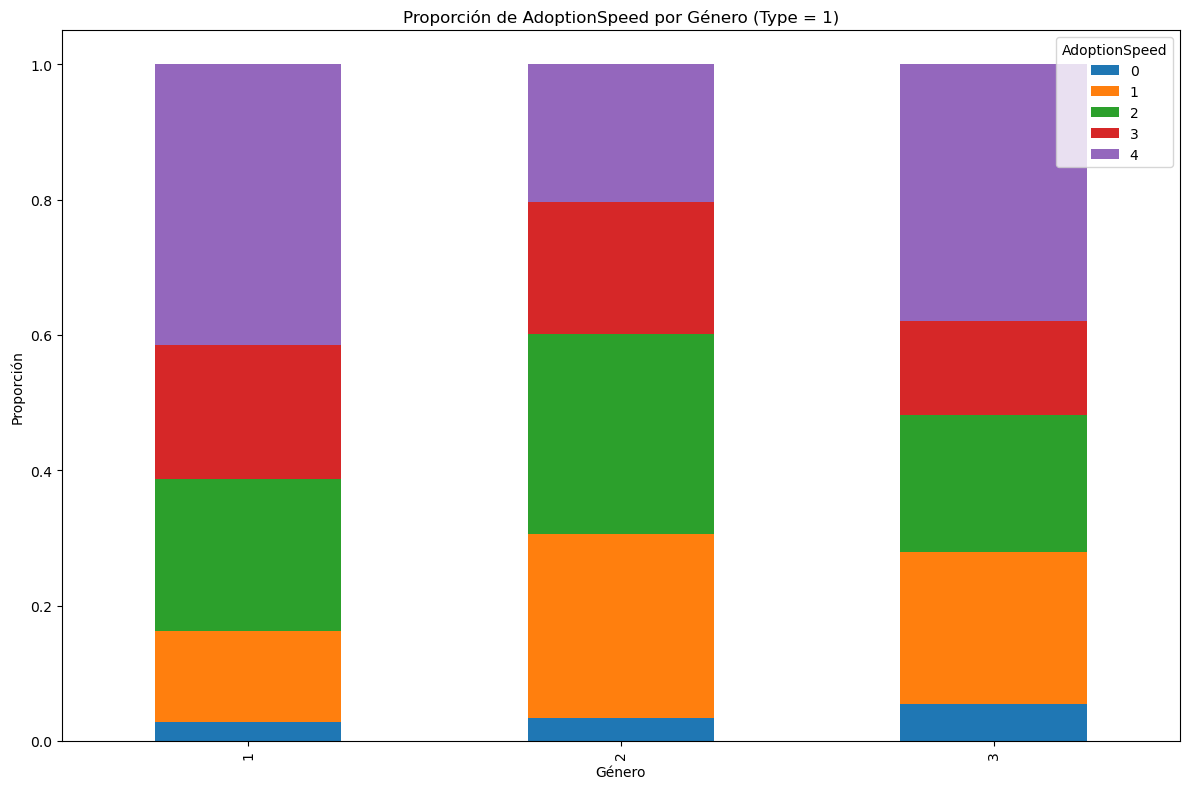

In [55]:
# Paso 1: contar por Puro y AdoptionSpeed
counts = df.groupby(['Sterilized', 'AdoptionSpeed']).size().unstack(fill_value=0)

# Paso 2: calcular proporciones por fila (cada barra suma 1)
proportions = counts.div(counts.sum(axis=1), axis=0)

# Paso 3: graficar barras apiladas con Puro en el eje X y segmentos por AdoptionSpeed
proportions.plot(kind='bar', stacked=True)

plt.title('Proporción de AdoptionSpeed por Género (Type = 1)')
plt.xlabel('Género')
plt.ylabel('Proporción')
plt.legend(title='AdoptionSpeed', loc='upper right')
plt.tight_layout()
plt.show()

# Paso 1: contar por Puro y AdoptionSpeed
counts = df_dog.groupby(['Sterilized', 'AdoptionSpeed']).size().unstack(fill_value=0)

# Paso 2: calcular proporciones por fila (cada barra suma 1)
proportions = counts.div(counts.sum(axis=1), axis=0)

# Paso 3: graficar barras apiladas con Puro en el eje X y segmentos por AdoptionSpeed
proportions.plot(kind='bar', stacked=True)

plt.title('Proporción de AdoptionSpeed por Género (Type = 1)')
plt.xlabel('Género')
plt.ylabel('Proporción')
plt.legend(title='AdoptionSpeed', loc='upper right')
plt.tight_layout()
plt.show()

# Paso 1: contar por Puro y AdoptionSpeed
counts = df_cat.groupby(['Sterilized', 'AdoptionSpeed']).size().unstack(fill_value=0)

# Paso 2: calcular proporciones por fila (cada barra suma 1)
proportions = counts.div(counts.sum(axis=1), axis=0)

# Paso 3: graficar barras apiladas con Puro en el eje X y segmentos por AdoptionSpeed
proportions.plot(kind='bar', stacked=True)

plt.title('Proporción de AdoptionSpeed por Género (Type = 1)')
plt.xlabel('Género')
plt.ylabel('Proporción')
plt.legend(title='AdoptionSpeed', loc='upper right')
plt.tight_layout()
plt.show()

### Salud en general

([<matplotlib.patches.Wedge at 0x253dd2c6300>,
 [Text(-1.0936014907382972, 0.1184726949764125, '1'),
  Text(1.0927297060702048, -0.12626079942612498, '2'),
  Text(1.09997208380057, -0.007836763326280922, '3')])

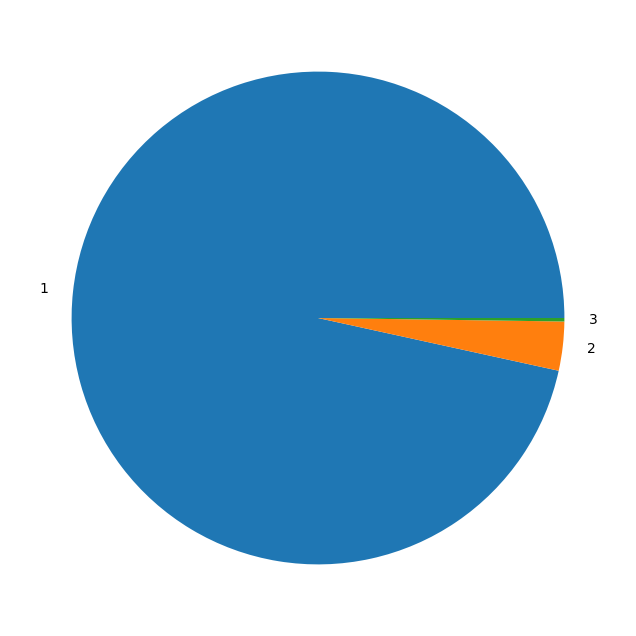

In [56]:
counts = df["Health"].value_counts()
labels = counts.index
sizes = counts.values

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

In [57]:
counts

Health
1    14478
2      481
3       34
Name: count, dtype: int64

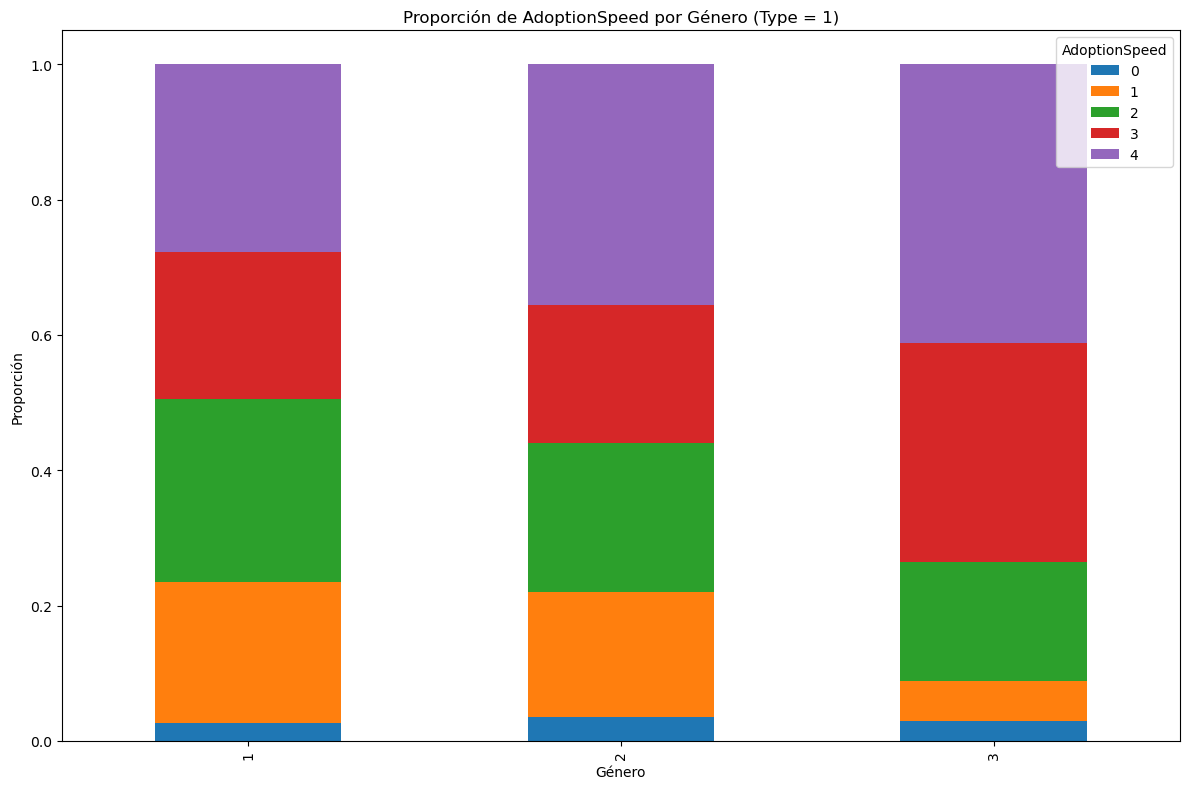

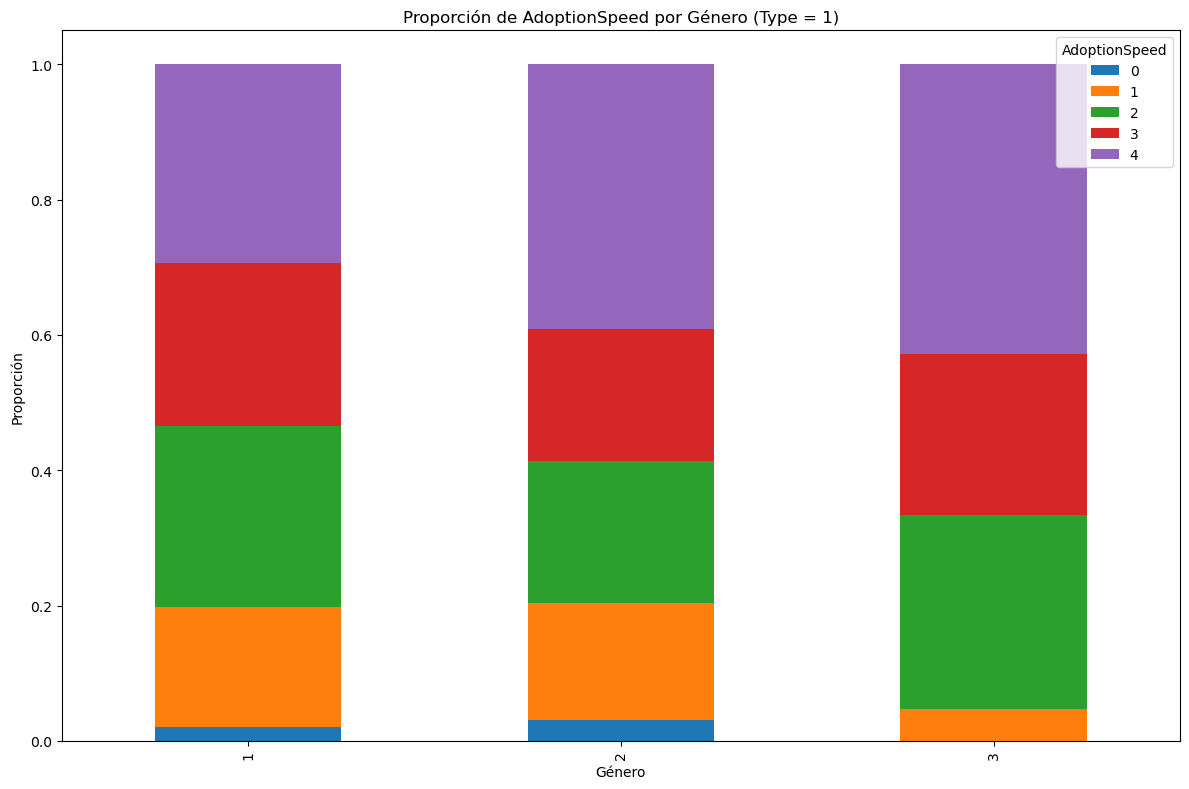

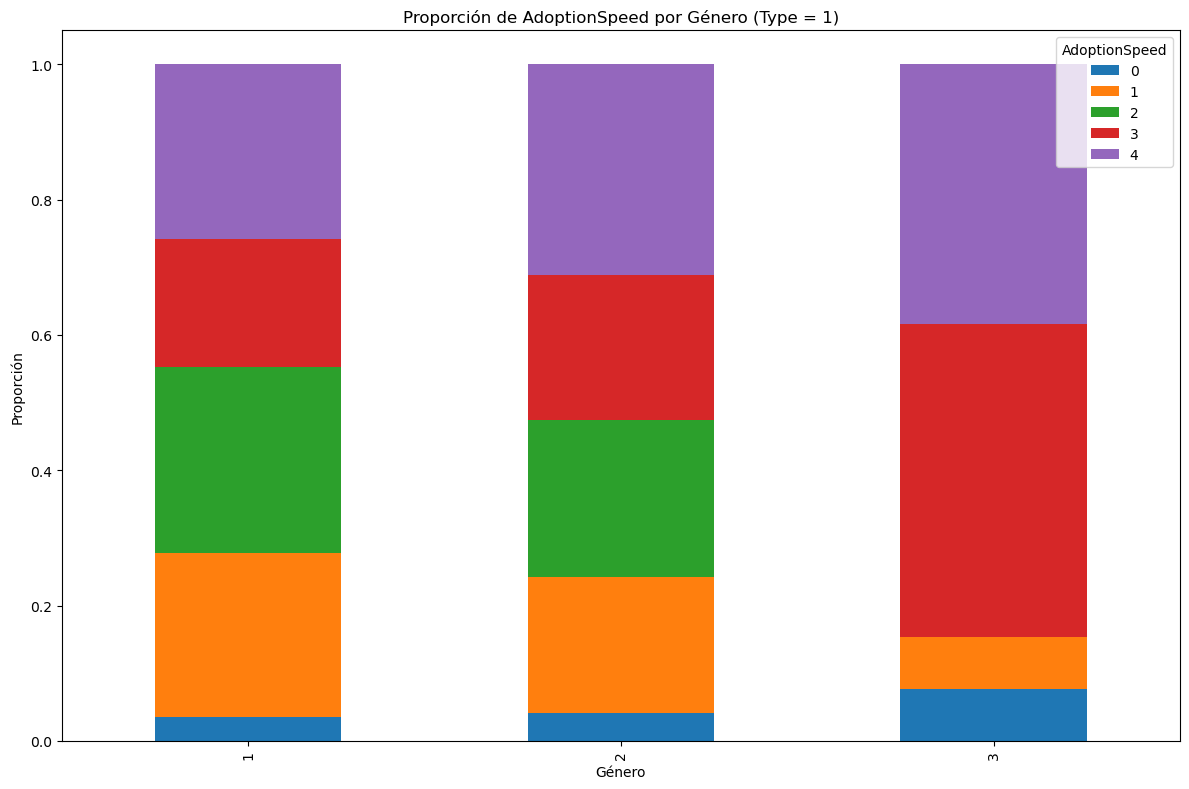

In [58]:
# Paso 1: contar por Puro y AdoptionSpeed
counts = df.groupby(['Health', 'AdoptionSpeed']).size().unstack(fill_value=0)

# Paso 2: calcular proporciones por fila (cada barra suma 1)
proportions = counts.div(counts.sum(axis=1), axis=0)

# Paso 3: graficar barras apiladas con Puro en el eje X y segmentos por AdoptionSpeed
proportions.plot(kind='bar', stacked=True)

plt.title('Proporción de AdoptionSpeed por Género (Type = 1)')
plt.xlabel('Género')
plt.ylabel('Proporción')
plt.legend(title='AdoptionSpeed', loc='upper right')
plt.tight_layout()
plt.show()

# Paso 1: contar por Puro y AdoptionSpeed
counts = df_dog.groupby(['Health', 'AdoptionSpeed']).size().unstack(fill_value=0)

# Paso 2: calcular proporciones por fila (cada barra suma 1)
proportions = counts.div(counts.sum(axis=1), axis=0)

# Paso 3: graficar barras apiladas con Puro en el eje X y segmentos por AdoptionSpeed
proportions.plot(kind='bar', stacked=True)

plt.title('Proporción de AdoptionSpeed por Género (Type = 1)')
plt.xlabel('Género')
plt.ylabel('Proporción')
plt.legend(title='AdoptionSpeed', loc='upper right')
plt.tight_layout()
plt.show()

# Paso 1: contar por Puro y AdoptionSpeed
counts = df_cat.groupby(['Health', 'AdoptionSpeed']).size().unstack(fill_value=0)

# Paso 2: calcular proporciones por fila (cada barra suma 1)
proportions = counts.div(counts.sum(axis=1), axis=0)

# Paso 3: graficar barras apiladas con Puro en el eje X y segmentos por AdoptionSpeed
proportions.plot(kind='bar', stacked=True)

plt.title('Proporción de AdoptionSpeed por Género (Type = 1)')
plt.xlabel('Género')
plt.ylabel('Proporción')
plt.legend(title='AdoptionSpeed', loc='upper right')
plt.tight_layout()
plt.show()

## impacto del Fee cobrado

In [122]:
df["Gratis"] = df["Fee"].apply(lambda x: 1 if x == 0 else 0)

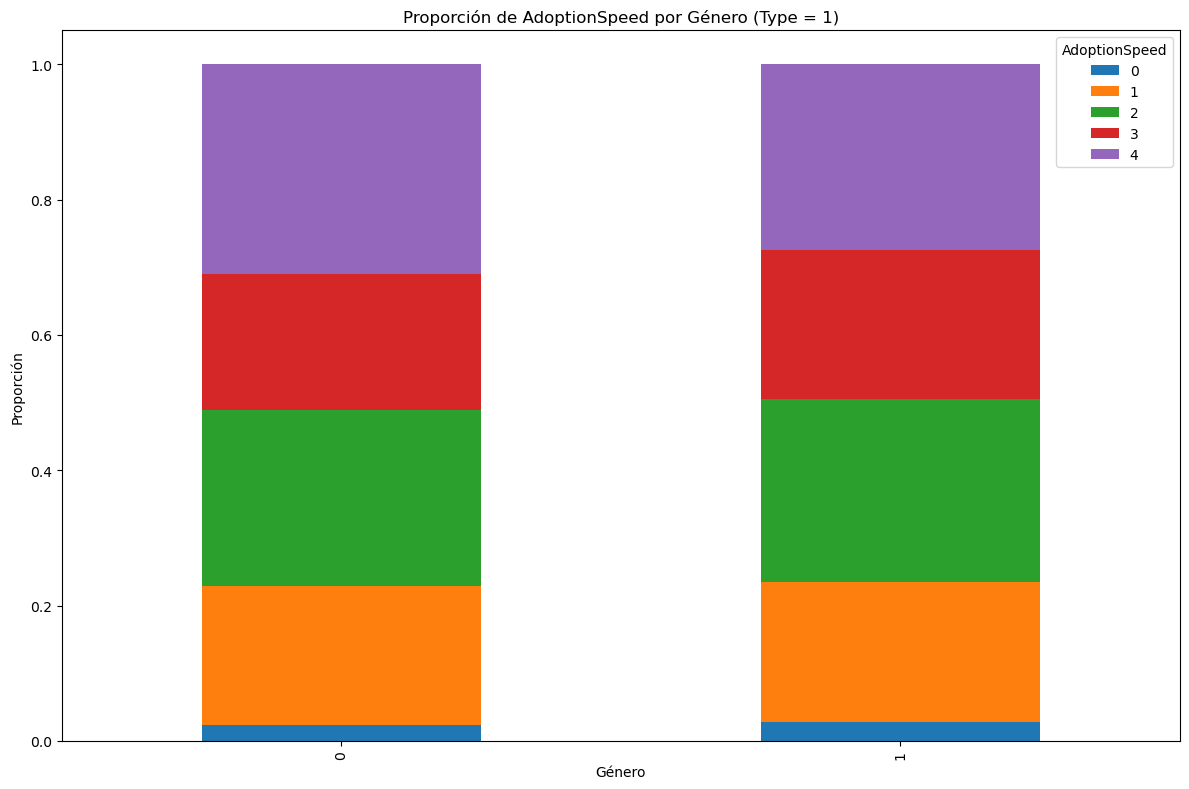

In [124]:
# Paso 1: contar por Puro y AdoptionSpeed
counts = df.groupby(['Gratis', 'AdoptionSpeed']).size().unstack(fill_value=0)

# Paso 2: calcular proporciones por fila (cada barra suma 1)
proportions = counts.div(counts.sum(axis=1), axis=0)

# Paso 3: graficar barras apiladas con Puro en el eje X y segmentos por AdoptionSpeed
proportions.plot(kind='bar', stacked=True)

plt.title('Proporción de AdoptionSpeed por Género (Type = 1)')
plt.xlabel('Género')
plt.ylabel('Proporción')
plt.legend(title='AdoptionSpeed', loc='upper right')
plt.tight_layout()
plt.show()

<Axes: xlabel='AdoptionSpeed', ylabel='Fee'>

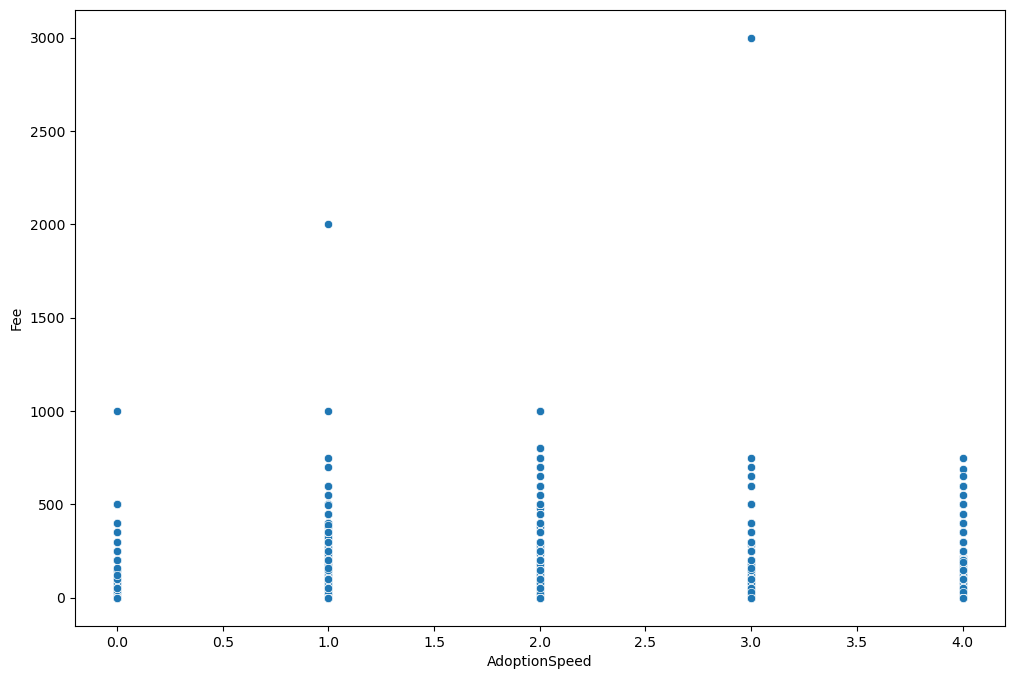

In [126]:
sns.scatterplot(df, x=df["AdoptionSpeed"], y=df["Fee"])

## impacto de tener Fotos y/o Videos

### Analisis de si tiene algo o nada

In [61]:
def content_checker(row):
    cant = row.VideoAmt + row.PhotoAmt
    if cant > 0:
        return 1
    else:
        return 0
        
df["Content"] = df.apply(content_checker, axis=1)

df_dog = df[df['Type'] == "Dog"]
df_cat = df[df['Type'] == "Cat"]

([<matplotlib.patches.Wedge at 0x253d2bf4c20>,
 [Text(-1.0972096464336885, 0.07830064988785569, '1'),
  Text(1.097209648266447, -0.07830062420581078, '0')])

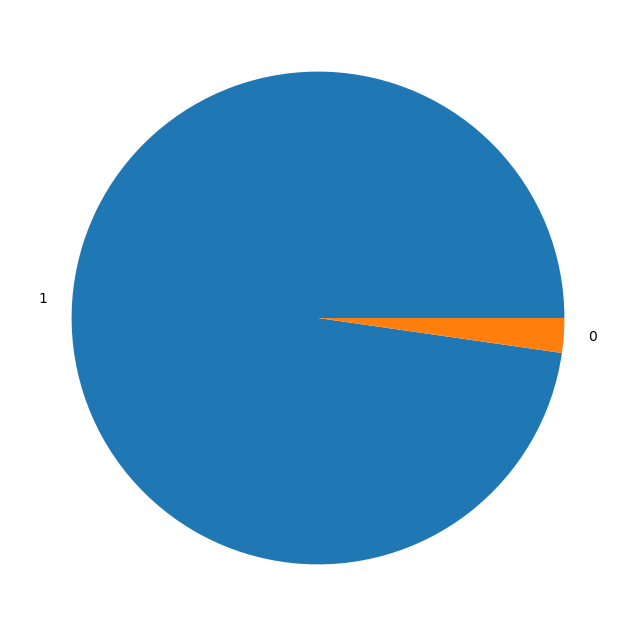

In [66]:
counts = df["Content"].value_counts()
labels = counts.index
sizes = counts.values

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

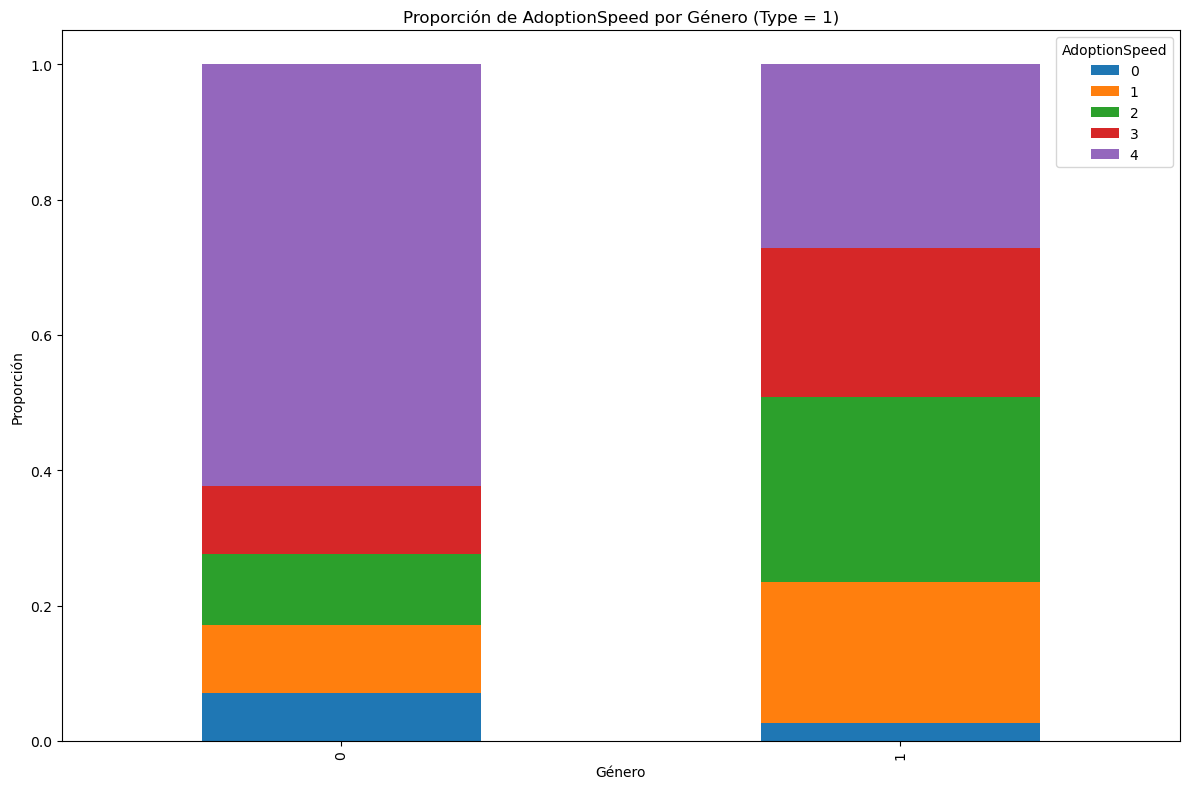

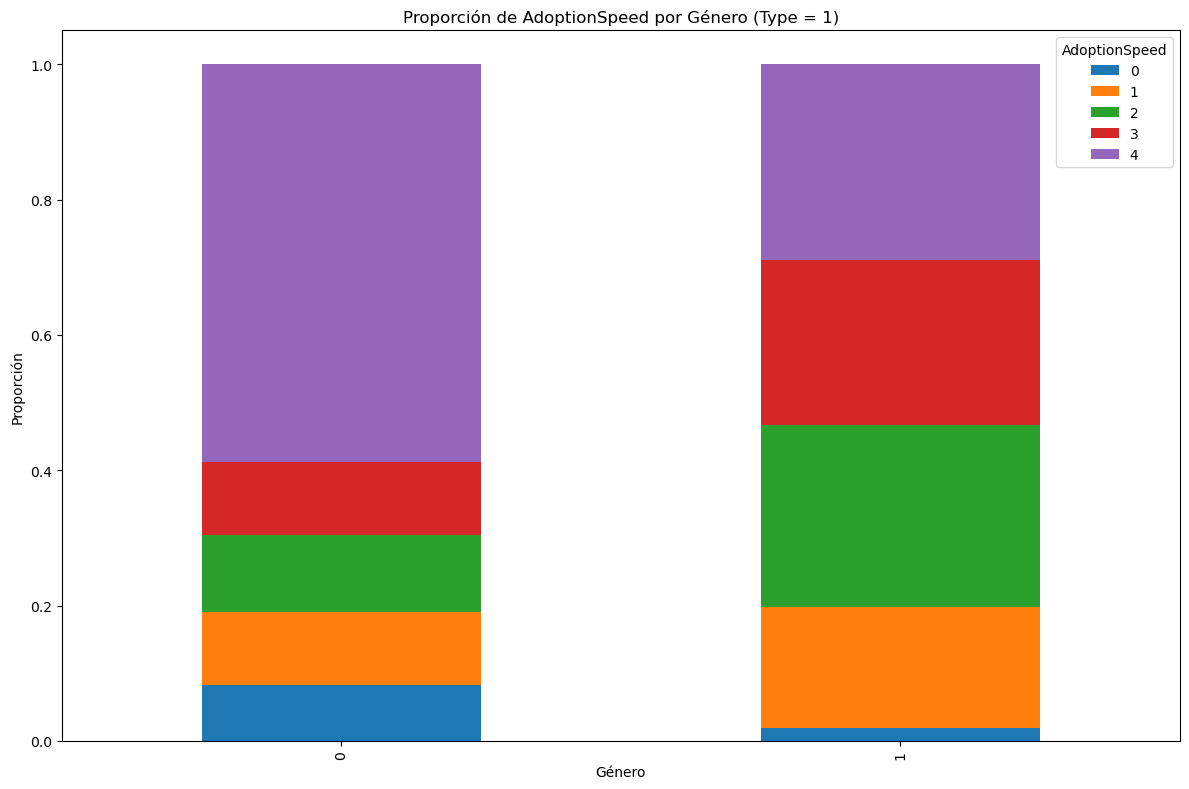

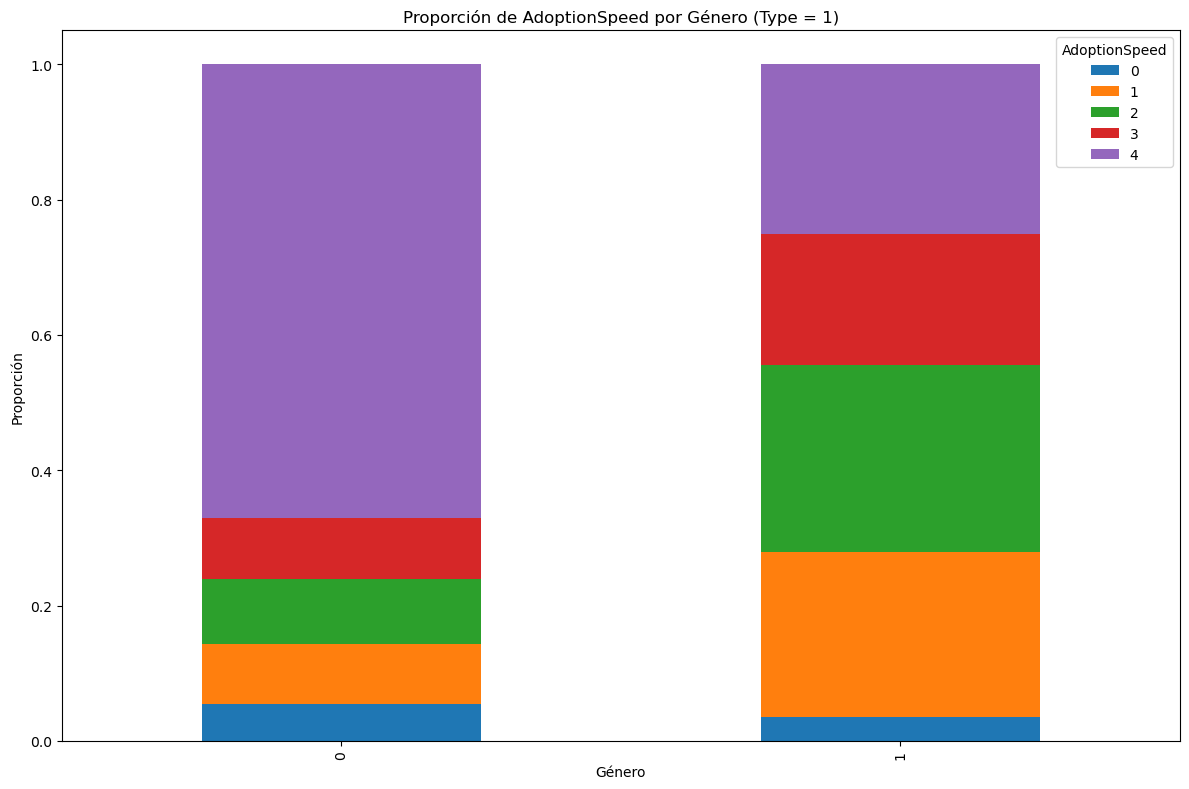

In [64]:
# Paso 1: contar por Puro y AdoptionSpeed
counts = df.groupby(['Content', 'AdoptionSpeed']).size().unstack(fill_value=0)

# Paso 2: calcular proporciones por fila (cada barra suma 1)
proportions = counts.div(counts.sum(axis=1), axis=0)

# Paso 3: graficar barras apiladas con Puro en el eje X y segmentos por AdoptionSpeed
proportions.plot(kind='bar', stacked=True)

plt.title('Proporción de AdoptionSpeed por Género (Type = 1)')
plt.xlabel('Género')
plt.ylabel('Proporción')
plt.legend(title='AdoptionSpeed', loc='upper right')
plt.tight_layout()
plt.show()

# Paso 1: contar por Puro y AdoptionSpeed
counts = df_dog.groupby(['Content', 'AdoptionSpeed']).size().unstack(fill_value=0)

# Paso 2: calcular proporciones por fila (cada barra suma 1)
proportions = counts.div(counts.sum(axis=1), axis=0)

# Paso 3: graficar barras apiladas con Puro en el eje X y segmentos por AdoptionSpeed
proportions.plot(kind='bar', stacked=True)

plt.title('Proporción de AdoptionSpeed por Género (Type = 1)')
plt.xlabel('Género')
plt.ylabel('Proporción')
plt.legend(title='AdoptionSpeed', loc='upper right')
plt.tight_layout()
plt.show()

# Paso 1: contar por Puro y AdoptionSpeed
counts = df_cat.groupby(['Content', 'AdoptionSpeed']).size().unstack(fill_value=0)

# Paso 2: calcular proporciones por fila (cada barra suma 1)
proportions = counts.div(counts.sum(axis=1), axis=0)

# Paso 3: graficar barras apiladas con Puro en el eje X y segmentos por AdoptionSpeed
proportions.plot(kind='bar', stacked=True)

plt.title('Proporción de AdoptionSpeed por Género (Type = 1)')
plt.xlabel('Género')
plt.ylabel('Proporción')
plt.legend(title='AdoptionSpeed', loc='upper right')
plt.tight_layout()
plt.show()

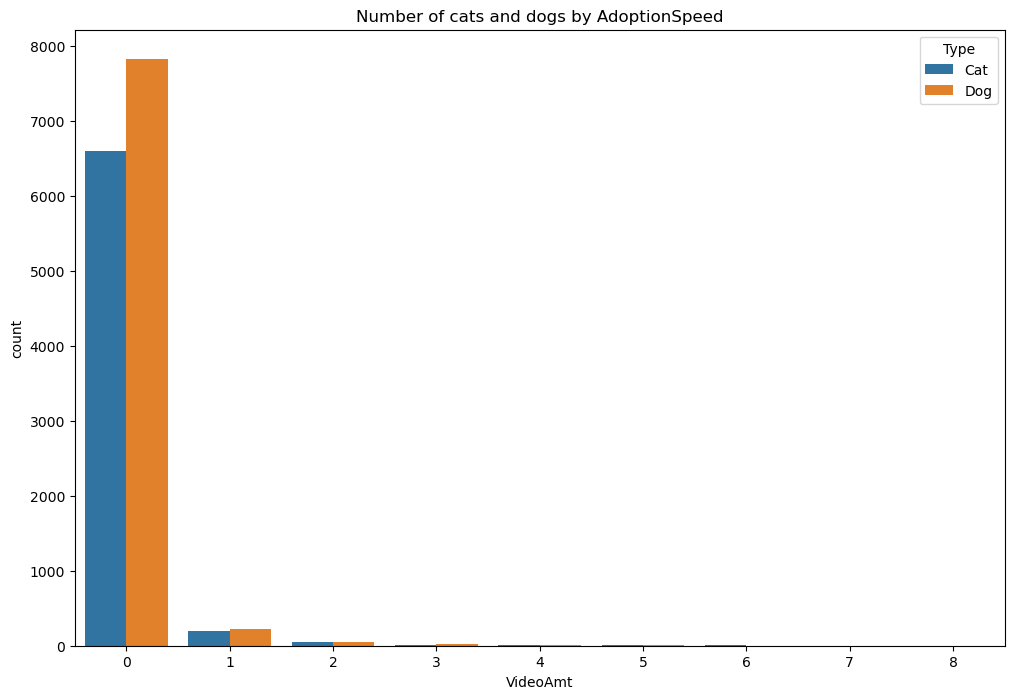

In [68]:
# Ahora analizamos cantidad de videos

sns.countplot(x='VideoAmt', data=df, hue='Type');
plt.title('Number of cats and dogs by AdoptionSpeed');

Vemos que mayormente no tienen videos. Esto impacta? Lo veremos:

In [71]:
df["TieneVideo"] = df["VideoAmt"].apply(lambda x: 1 if x > 0 else 0)
df_dog = df[df['Type'] == "Dog"]
df_cat = df[df['Type'] == "Cat"]

([<matplotlib.patches.Wedge at 0x253dcf68830>,
 [Text(-1.0920533204112557, 0.13198312535605278, '0'),
  Text(1.0920533173219673, -0.13198315091740584, '1')])

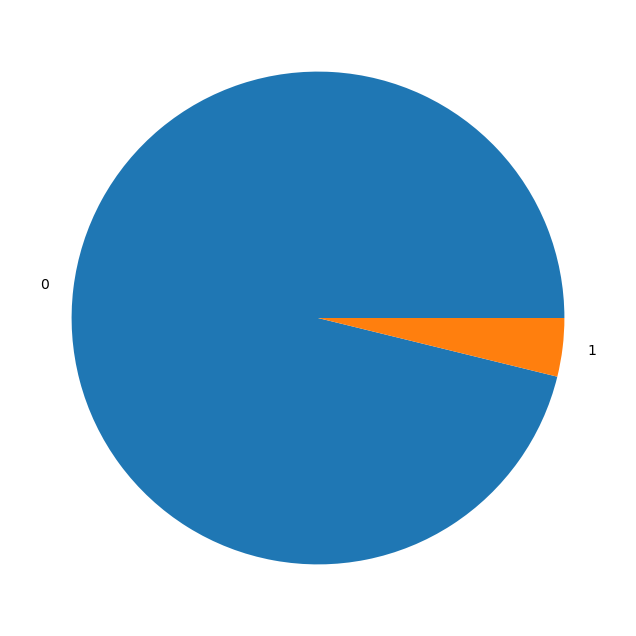

In [72]:
counts = df["TieneVideo"].value_counts()
labels = counts.index
sizes = counts.values

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

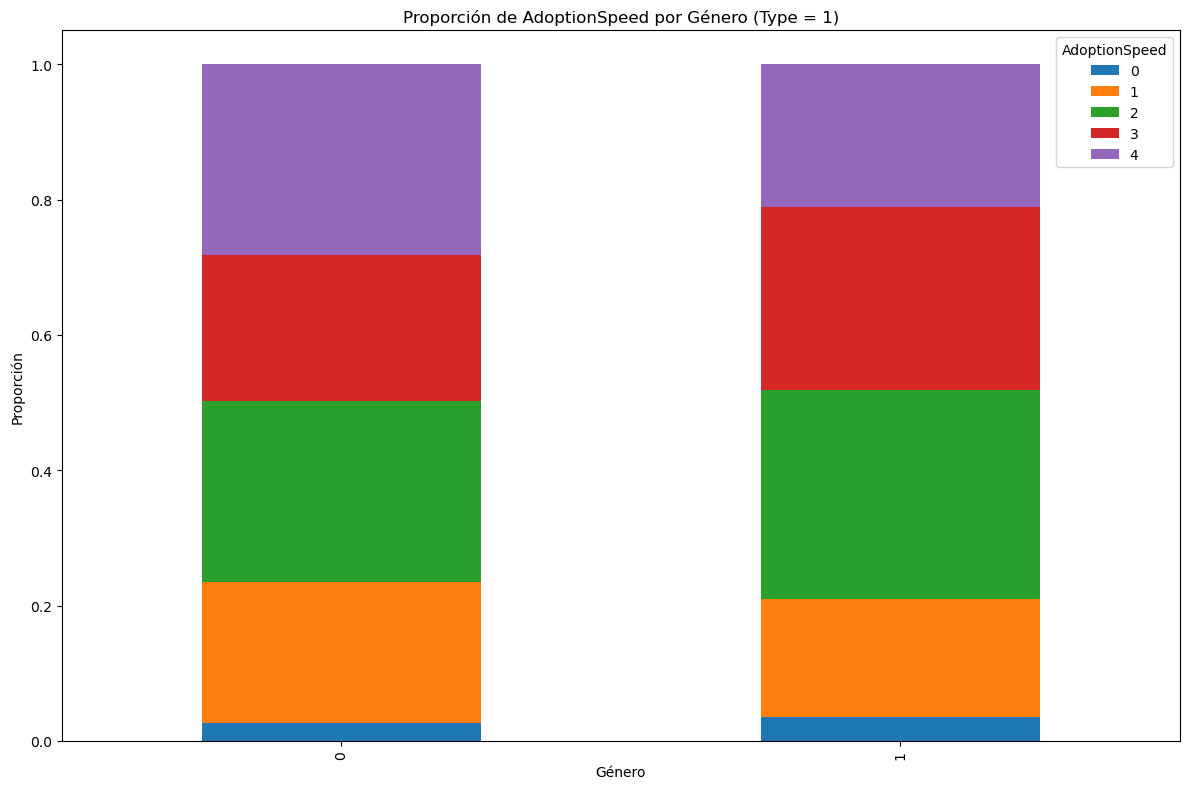

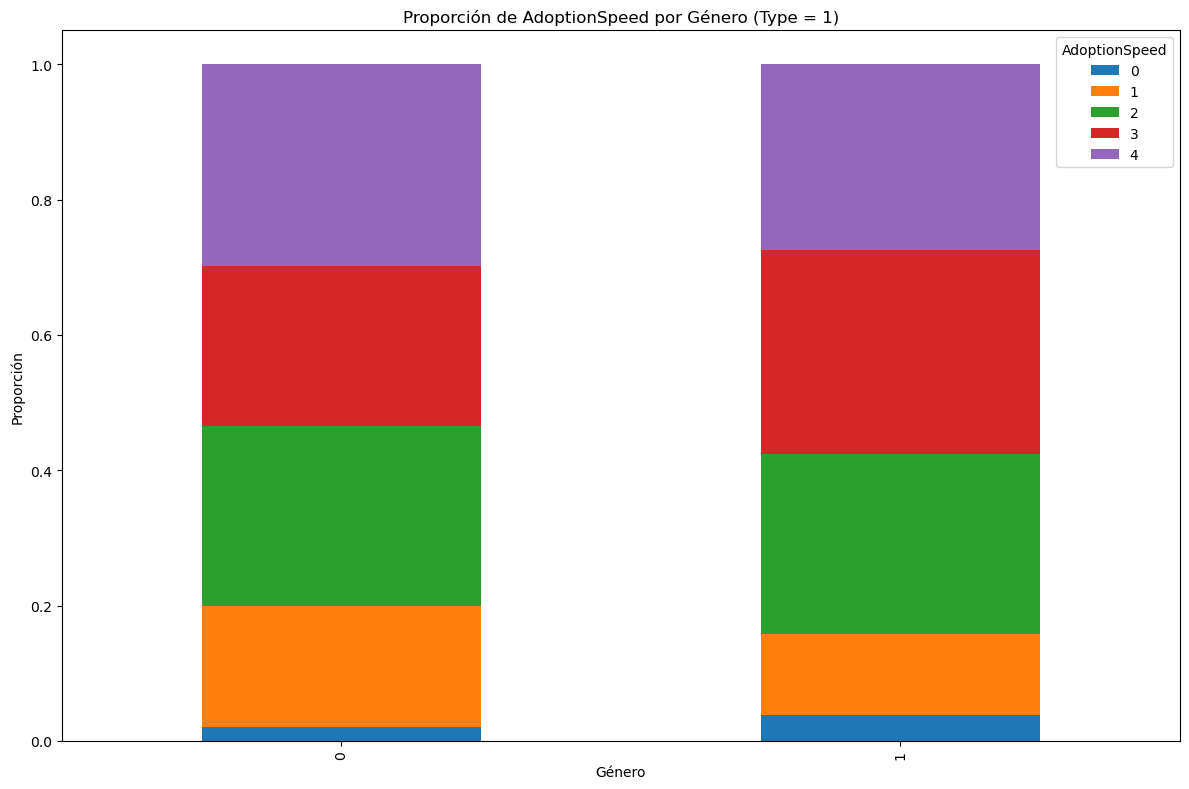

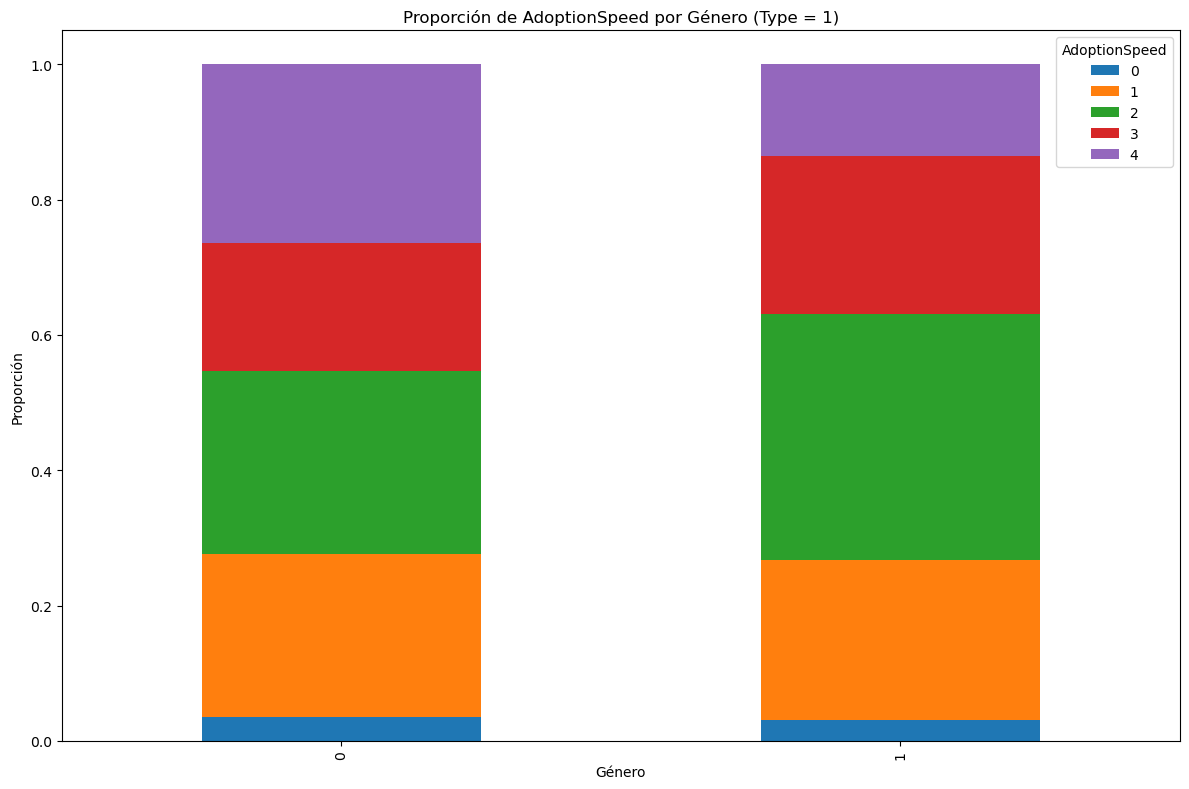

In [73]:
# Paso 1: contar por Puro y AdoptionSpeed
counts = df.groupby(['TieneVideo', 'AdoptionSpeed']).size().unstack(fill_value=0)

# Paso 2: calcular proporciones por fila (cada barra suma 1)
proportions = counts.div(counts.sum(axis=1), axis=0)

# Paso 3: graficar barras apiladas con Puro en el eje X y segmentos por AdoptionSpeed
proportions.plot(kind='bar', stacked=True)

plt.title('Proporción de AdoptionSpeed por Género (Type = 1)')
plt.xlabel('Género')
plt.ylabel('Proporción')
plt.legend(title='AdoptionSpeed', loc='upper right')
plt.tight_layout()
plt.show()

# Paso 1: contar por Puro y AdoptionSpeed
counts = df_dog.groupby(['TieneVideo', 'AdoptionSpeed']).size().unstack(fill_value=0)

# Paso 2: calcular proporciones por fila (cada barra suma 1)
proportions = counts.div(counts.sum(axis=1), axis=0)

# Paso 3: graficar barras apiladas con Puro en el eje X y segmentos por AdoptionSpeed
proportions.plot(kind='bar', stacked=True)

plt.title('Proporción de AdoptionSpeed por Género (Type = 1)')
plt.xlabel('Género')
plt.ylabel('Proporción')
plt.legend(title='AdoptionSpeed', loc='upper right')
plt.tight_layout()
plt.show()

# Paso 1: contar por Puro y AdoptionSpeed
counts = df_cat.groupby(['TieneVideo', 'AdoptionSpeed']).size().unstack(fill_value=0)

# Paso 2: calcular proporciones por fila (cada barra suma 1)
proportions = counts.div(counts.sum(axis=1), axis=0)

# Paso 3: graficar barras apiladas con Puro en el eje X y segmentos por AdoptionSpeed
proportions.plot(kind='bar', stacked=True)

plt.title('Proporción de AdoptionSpeed por Género (Type = 1)')
plt.xlabel('Género')
plt.ylabel('Proporción')
plt.legend(title='AdoptionSpeed', loc='upper right')
plt.tight_layout()
plt.show()

No parece ser que solamente la presencia de video o no sea lo que cambia. Veamos que pasa con las fotos, pero ahora por rangos.

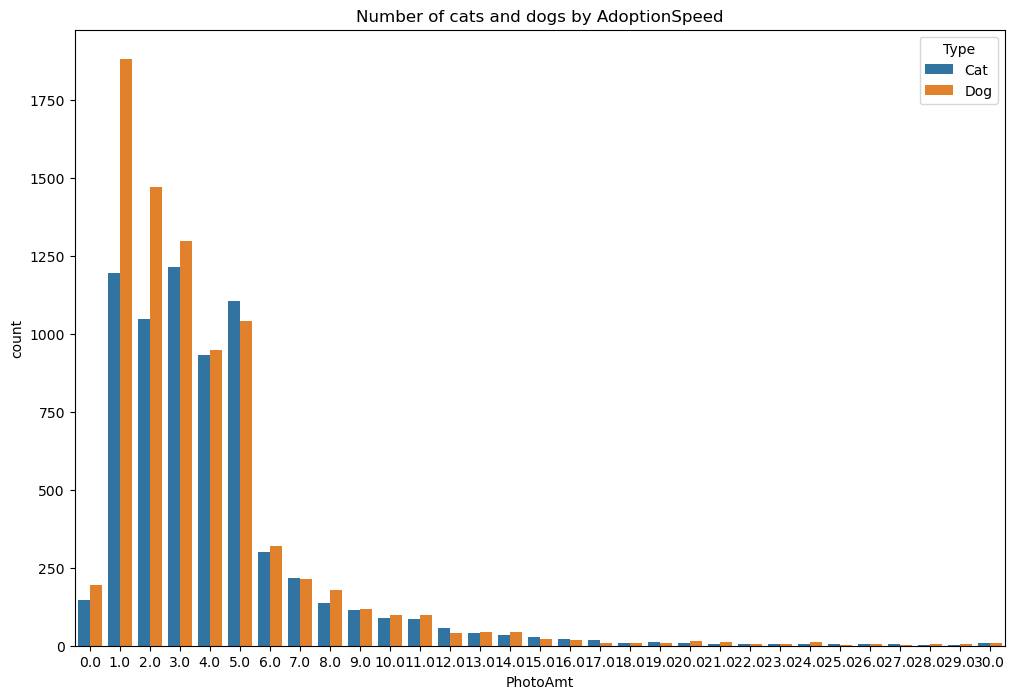

In [74]:
# Ahora analizamos cantidad de videos

sns.countplot(x='PhotoAmt', data=df, hue='Type');
plt.title('Number of cats and dogs by AdoptionSpeed');

In [78]:
def photo_category(row):
    '''
    Categorias:
    0 -> sin foto
    1 -> de 1 a 5
    2 -> de 6 a 10
    3 -> más de 10
    '''
    if row.PhotoAmt < 1:
        return 0
    elif row.PhotoAmt < 6:
        return 1
    elif row.PhotoAmt < 11:
        return 2
    else:
        return 3
        
df["PhotoCategory"] = df.apply(photo_category, axis=1)

df_dog = df[df['Type'] == "Dog"]
df_cat = df[df['Type'] == "Cat"]

([<matplotlib.patches.Wedge at 0x253e15f1430>,
 [Text(-0.9081882225034571, 0.6206401151279308, '1'),
  Text(0.7469622714848626, -0.8074944984197567, '2'),
  Text(1.052070336037454, -0.32116663592290956, '3'),
  Text(1.097193224679265, -0.07853042542808433, '0')])

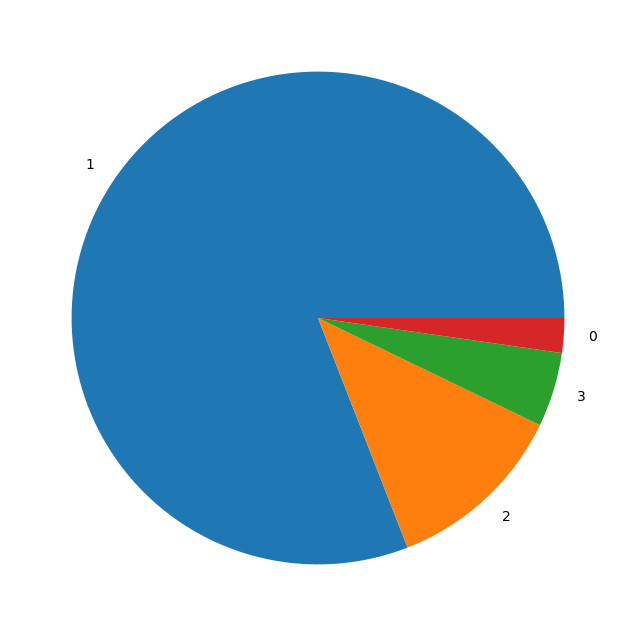

In [79]:
counts = df["PhotoCategory"].value_counts()
labels = counts.index
sizes = counts.values

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

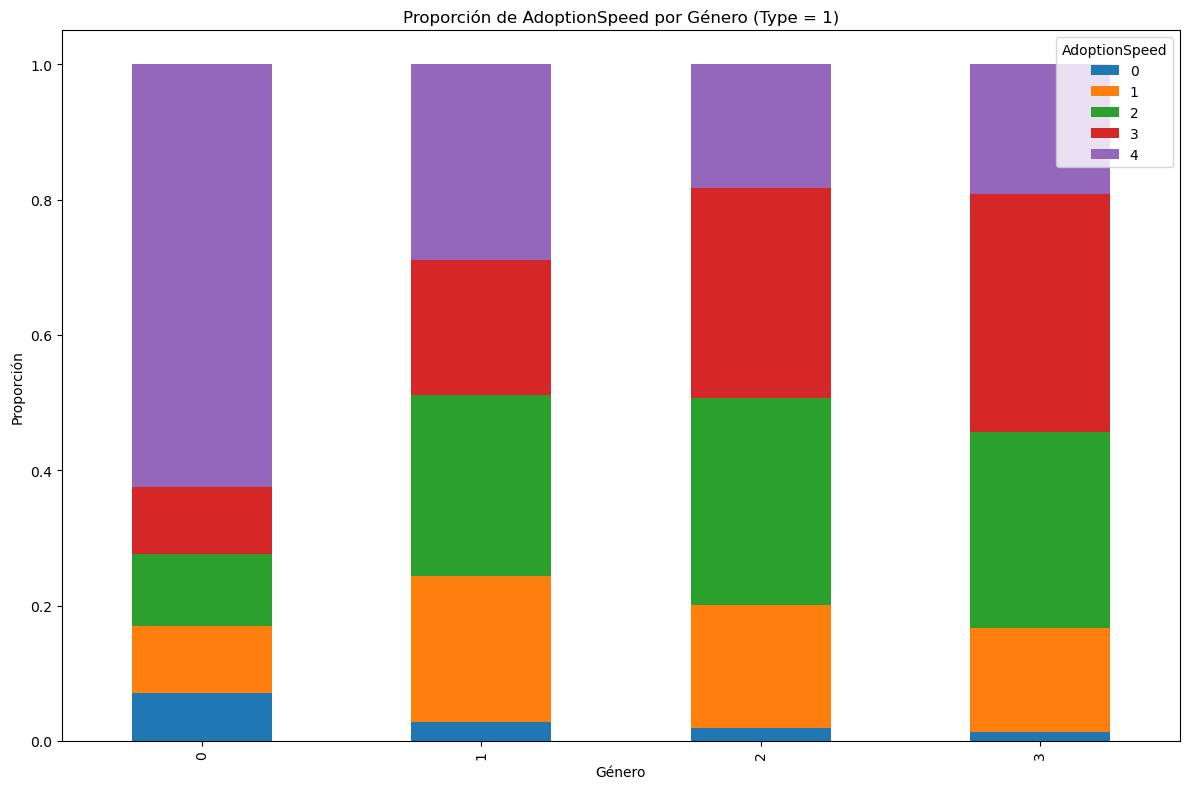

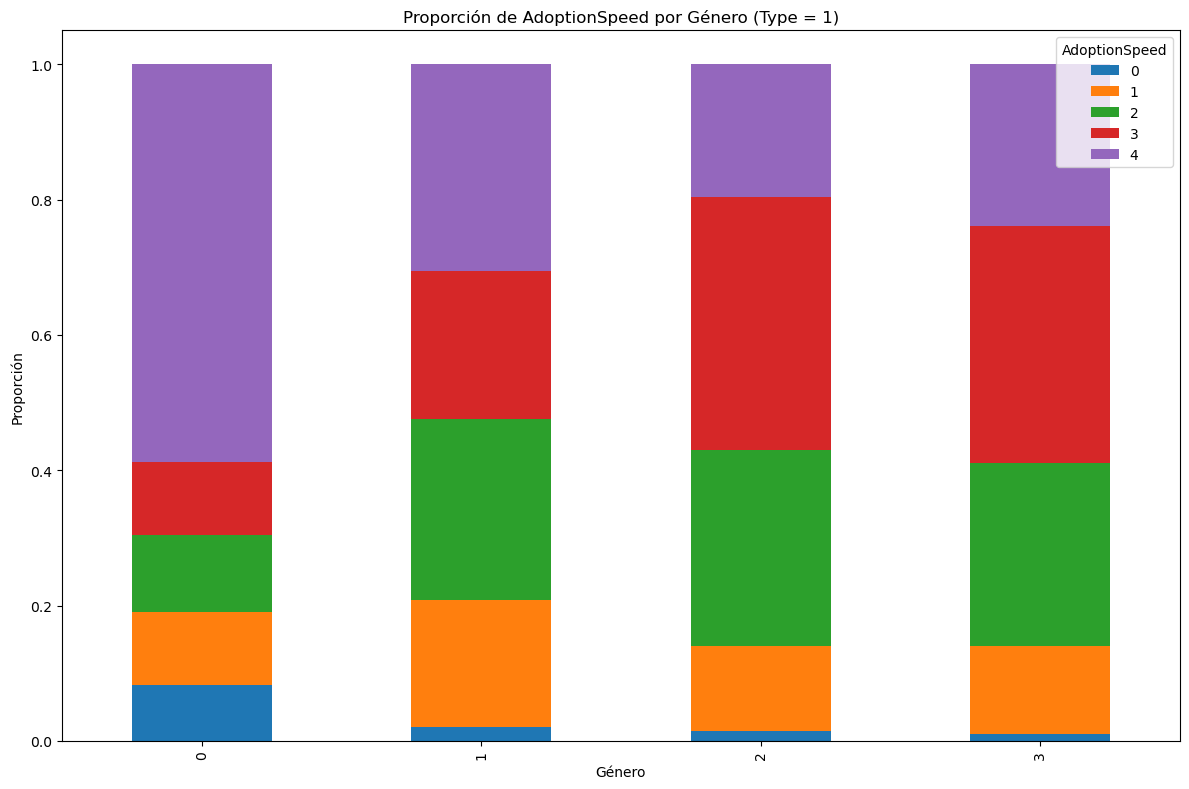

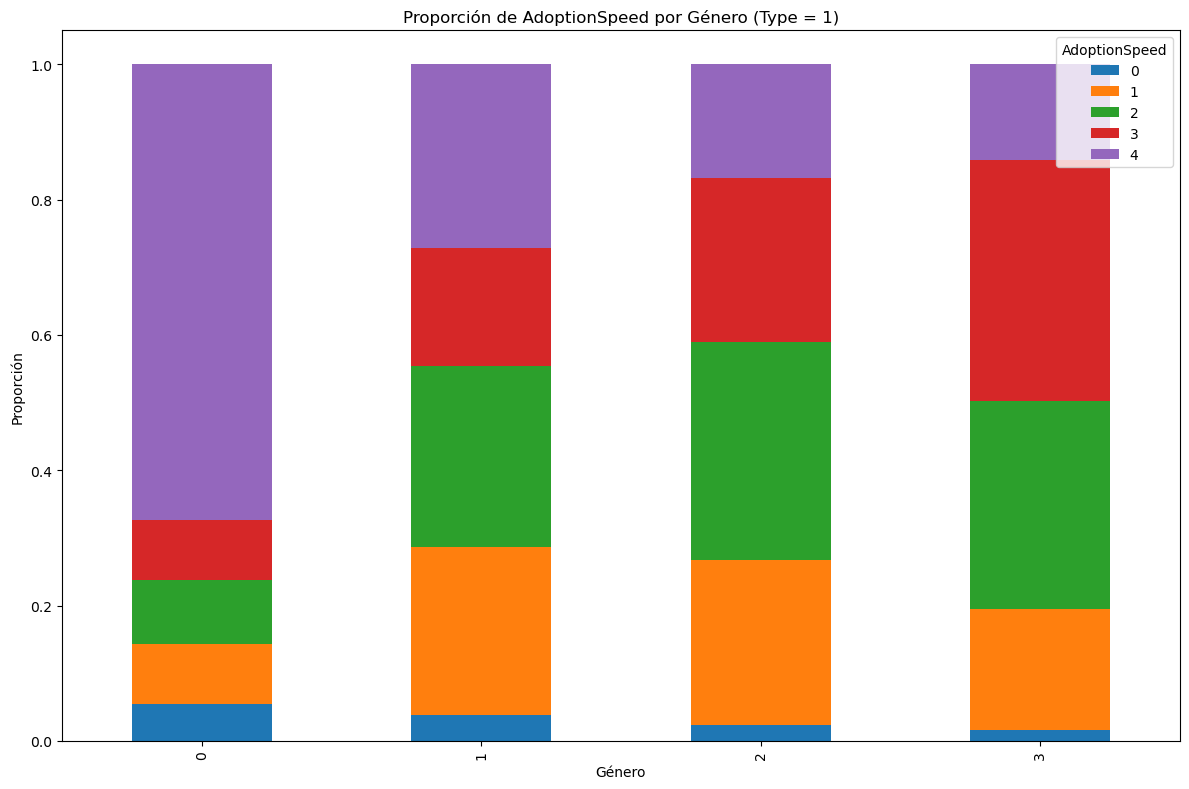

In [80]:
# Paso 1: contar por Puro y AdoptionSpeed
counts = df.groupby(['PhotoCategory', 'AdoptionSpeed']).size().unstack(fill_value=0)

# Paso 2: calcular proporciones por fila (cada barra suma 1)
proportions = counts.div(counts.sum(axis=1), axis=0)

# Paso 3: graficar barras apiladas con Puro en el eje X y segmentos por AdoptionSpeed
proportions.plot(kind='bar', stacked=True)

plt.title('Proporción de AdoptionSpeed por Género (Type = 1)')
plt.xlabel('Género')
plt.ylabel('Proporción')
plt.legend(title='AdoptionSpeed', loc='upper right')
plt.tight_layout()
plt.show()

# Paso 1: contar por Puro y AdoptionSpeed
counts = df_dog.groupby(['PhotoCategory', 'AdoptionSpeed']).size().unstack(fill_value=0)

# Paso 2: calcular proporciones por fila (cada barra suma 1)
proportions = counts.div(counts.sum(axis=1), axis=0)

# Paso 3: graficar barras apiladas con Puro en el eje X y segmentos por AdoptionSpeed
proportions.plot(kind='bar', stacked=True)

plt.title('Proporción de AdoptionSpeed por Género (Type = 1)')
plt.xlabel('Género')
plt.ylabel('Proporción')
plt.legend(title='AdoptionSpeed', loc='upper right')
plt.tight_layout()
plt.show()

# Paso 1: contar por Puro y AdoptionSpeed
counts = df_cat.groupby(['PhotoCategory', 'AdoptionSpeed']).size().unstack(fill_value=0)

# Paso 2: calcular proporciones por fila (cada barra suma 1)
proportions = counts.div(counts.sum(axis=1), axis=0)

# Paso 3: graficar barras apiladas con Puro en el eje X y segmentos por AdoptionSpeed
proportions.plot(kind='bar', stacked=True)

plt.title('Proporción de AdoptionSpeed por Género (Type = 1)')
plt.xlabel('Género')
plt.ylabel('Proporción')
plt.legend(title='AdoptionSpeed', loc='upper right')
plt.tight_layout()
plt.show()